In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import local_config

df = pd.read_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations_wrongxy.csv')

targ = 'x'

plt.scatter(df[f"Strain Rate {targ}"], df[f"Sigma_{targ}"], alpha=0.1, s=10)
plt.xlabel(f"Strain Rate {targ}")
plt.ylabel(f"Sigma {targ}")
plt.title(f"Strain vs stress ({targ})")
plt.show()


DP Parameters in $(\alpha, k)$ space

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

plt.scatter(df["alpha"], df["k"], color='black', s=20, alpha=0.2)
plt.xlabel(r"$\alpha$", fontsize=18)
plt.ylabel(r"$k$", fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Fit Drucker-Prager parameters for 1000 samples", fontsize=20)
plt.tight_layout()


DP Parameters in $\sigma_{ts}, \sigma_{cs}$ space

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

cs = (3 * df["k"]) / (np.sqrt(3) - 3 * df["alpha"])
ts = (3 * df["k"]) / (np.sqrt(3) + 3 * df["alpha"])
bs = (3 * df["k"]) / (np.sqrt(3) + 6 * df["alpha"])


plt.scatter(ts, cs, color='red', s=20, alpha=0.2, label='Compressive')
plt.scatter(ts, bs, color='blue', s=20, alpha=0.2, label='Biaxial Tensile')
plt.xlabel(r"Uniaxial Tensile Strength (GPa)", fontsize=18)
plt.ylabel(r"Compressive or Biaxial Tensile Strength(GPa)", fontsize=18)

plt.xlim(20, 130)
plt.ylim(20, 130)

plt.legend(fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Uniaxial Tensile, Compressive, and Biaxial Tensile Strengths", fontsize=20)
plt.tight_layout()

Probing the DP Parameter constraints

/tmp/ipykernel_799747/2048958762.py:16: RuntimeWarning: divide by zero encountered in divide
  alpha = (CS - ts) / (np.sqrt(3) * (CS + ts))
/tmp/ipykernel_799747/2048958762.py:17: RuntimeWarning: divide by zero encountered in divide
  k = (2 * CS * ts) / (np.sqrt(3) * (CS + ts))
/tmp/ipykernel_799747/2048958762.py:128: RuntimeWarning: divide by zero encountered in divide
  alpha = (ts) / (np.sqrt(3) * (3 * CS - ts))
/tmp/ipykernel_799747/2048958762.py:129: RuntimeWarning: divide by zero encountered in divide
  k = (np.sqrt(3) * CS * ts) / (3 * CS - ts)


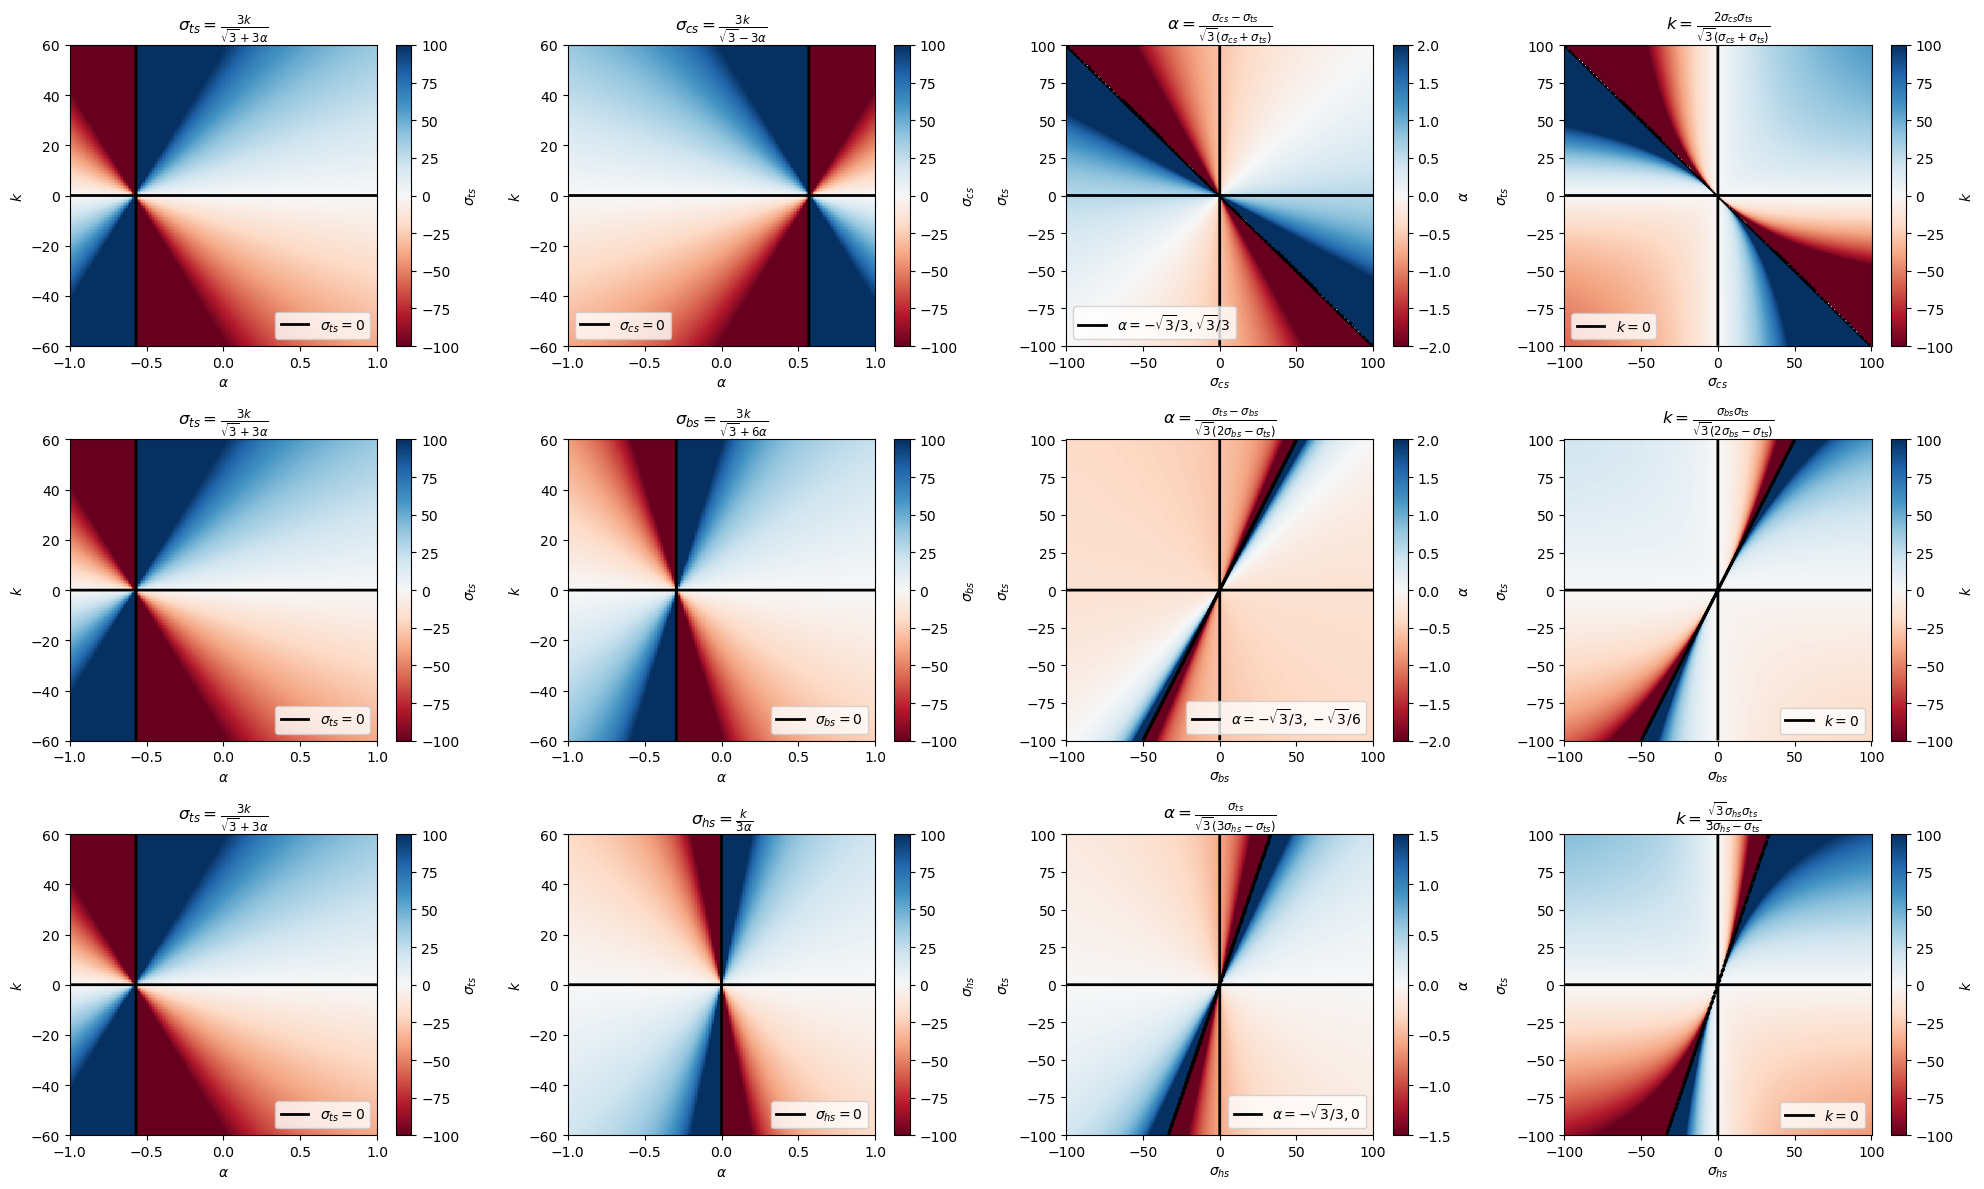

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


proxy = Line2D([0], [0], color='k', lw=2)

# Define ranges for σ_cs and σ_ts
sigma_cs = np.linspace(-100, 100, 500)
sigma_ts = np.linspace(-100, 100, 500)

# Create meshgrid
CS, ts = np.meshgrid(sigma_cs, sigma_ts)

# Compute alpha
alpha = (CS - ts) / (np.sqrt(3) * (CS + ts))
k = (2 * CS * ts) / (np.sqrt(3) * (CS + ts))

# Plot
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))

c02 = axs[0, 2].pcolormesh(CS, ts, alpha, shading='auto', cmap='RdBu', vmin=-2, vmax=2)
fig.colorbar(c02, ax=axs[0, 2], label=r'$\alpha$')

axs[0, 2].set_xlabel(r'$\sigma_{cs}$')
axs[0, 2].set_ylabel(r'$\sigma_{ts}$')
axs[0, 2].set_title(r'$\alpha = \frac{\sigma_{cs} - \sigma_{ts}}{\sqrt{3} (\sigma_{cs} + \sigma_{ts})}$')
axs[0, 2].contour(CS, ts, alpha, levels=[np.sqrt(3)/3], colors=['k'], linewidths=2)
axs[0, 2].contour(CS, ts, alpha, levels=[-np.sqrt(3)/3], colors=['k'], linewidths=2)
axs[0, 2].legend([proxy], [r'$\alpha = -\sqrt{3}/3, \sqrt{3}/3$'], loc='lower left')

c03 = axs[0, 3].pcolormesh(CS, ts, k, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c03, ax=axs[0, 3], label=r'$k$')

axs[0, 3].set_xlabel(r'$\sigma_{cs}$')
axs[0, 3].set_ylabel(r'$\sigma_{ts}$')
axs[0, 3].set_title(r'$k = \frac{2 \sigma_{cs} \sigma_{ts}}{\sqrt{3} (\sigma_{cs} + \sigma_{ts})}$')
axs[0, 3].contour(CS, ts, k, levels=[0], colors=['k'], linewidths=2)
axs[0, 3].legend([proxy], [r'$k = 0$'], loc='lower left')

amin = -1
amax = 1
kmin = -60
kmax = 60

alphs = np.linspace(amin, amax, 200)
ks = np.linspace(kmin, kmax, 200)

AS, KS = np.meshgrid(alphs, ks)

sig_cs = (3 * KS) / (np.sqrt(3) - 3 * AS)
sig_ts = (3 * KS) / (np.sqrt(3) + 3 * AS)

axs[0, 0].set_xlabel(r'$\alpha$')
axs[0, 0].set_ylabel(r'$k$')
axs[0, 0].set_title(r'$\sigma_{ts} = \frac{3k}{\sqrt{3} + 3\alpha}$')
axs[0, 0].set_xlim(amin, amax)
axs[0, 0].set_ylim(kmin, kmax)

c00 = axs[0, 0].pcolormesh(AS, KS, sig_ts, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c00, ax=axs[0, 0], label=r'$\sigma_{ts}$')
axs[0, 0].contour(AS, KS, sig_ts, levels=[0], colors=['k'], linewidths=2)
axs[0, 0].legend([proxy], [r'$\sigma_{ts} = 0$'], loc='lower right')

axs[0, 1].set_xlabel(r'$\alpha$')
axs[0, 1].set_ylabel(r'$k$')
axs[0, 1].set_title(r'$\sigma_{cs} = \frac{3k}{\sqrt{3} - 3\alpha}$')
axs[0, 1].set_xlim(amin, amax)
axs[0, 1].set_ylim(kmin, kmax)

c01 = axs[0, 1].pcolormesh(AS, KS, sig_cs, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c01, ax=axs[0, 1], label=r'$\sigma_{cs}$')
axs[0, 1].contour(AS, KS, sig_cs, levels=[0], colors=['k'], linewidths=2)
axs[0, 1].legend([proxy], [r'$\sigma_{cs} = 0$'], loc='lower left')



# Now do this for bs and ts (cs turns into bs here)
alpha = (ts - CS) / (np.sqrt(3) * (2*CS - ts))
k = (CS * ts) / (np.sqrt(3) * (2*CS - ts))

c12 = axs[1, 2].pcolormesh(CS, ts, alpha, shading='auto', cmap='RdBu', vmin=-2, vmax=2)
fig.colorbar(c12, ax=axs[1, 2], label=r'$\alpha$')

axs[1, 2].set_xlabel(r'$\sigma_{bs}$')
axs[1, 2].set_ylabel(r'$\sigma_{ts}$')
axs[1, 2].set_title(r'$\alpha = \frac{\sigma_{ts}-\sigma_{bs}}{\sqrt{3}(2\sigma_{bs}-\sigma_{ts})}$')
axs[1, 2].contour(CS, ts, alpha, levels=[-np.sqrt(3)/3], colors=['k'], linewidths=2, linestyles='solid')
axs[1, 2].contour(CS, ts, alpha, levels=[-np.sqrt(3)/6], colors=['k'], linewidths=2, linestyles='solid')
axs[1, 2].legend([proxy], [r'$\alpha = -\sqrt{3}/3, -\sqrt{3}/6$'], loc='lower right')

c13 = axs[1, 3].pcolormesh(CS, ts, k, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c13, ax=axs[1, 3], label=r'$k$')

axs[1, 3].set_xlabel(r'$\sigma_{bs}$')
axs[1, 3].set_ylabel(r'$\sigma_{ts}$')
axs[1, 3].set_title(r'$k = \frac{\sigma_{bs}\sigma_{ts}}{\sqrt{3}(2\sigma_{bs}-\sigma_{ts})}$')
axs[1, 3].contour(CS, ts, k, levels=[0], colors=['k'], linewidths=2)
axs[1, 3].legend([proxy], [r'$k = 0$'], loc='lower right')

sig_bs = (3 * KS) / (np.sqrt(3) + 6 * AS)
sig_ts = (3 * KS) / (np.sqrt(3) + 3 * AS)

axs[1, 0].set_xlabel(r'$\alpha$')
axs[1, 0].set_ylabel(r'$k$')
axs[1, 0].set_title(r'$\sigma_{ts} = \frac{3k}{\sqrt{3} + 3\alpha}$')
axs[1, 0].set_xlim(amin, amax)
axs[1, 0].set_ylim(kmin, kmax)

c10 = axs[1, 0].pcolormesh(AS, KS, sig_ts, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c10, ax=axs[1, 0], label=r'$\sigma_{ts}$')
axs[1, 0].contour(AS, KS, sig_ts, levels=[0], colors=['k'], linewidths=2)
axs[1, 0].legend([proxy], [r'$\sigma_{ts} = 0$'], loc='lower right')

axs[1, 1].set_xlabel(r'$\alpha$')
axs[1, 1].set_ylabel(r'$k$')
axs[1, 1].set_title(r'$\sigma_{bs} = \frac{3k}{\sqrt{3} + 6\alpha}$')
axs[1, 1].set_xlim(amin, amax)
axs[1, 1].set_ylim(kmin, kmax)

c11 = axs[1, 1].pcolormesh(AS, KS, sig_bs, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c11, ax=axs[1, 1], label=r'$\sigma_{bs}$')
axs[1, 1].contour(AS, KS, sig_bs, levels=[0], colors=['k'], linewidths=2)
axs[1, 1].legend([proxy], [r'$\sigma_{bs} = 0$'], loc='lower right')


# Now do this for hs and ts (cs turns into hs here)
alpha = (ts) / (np.sqrt(3) * (3 * CS - ts))
k = (np.sqrt(3) * CS * ts) / (3 * CS - ts)

c22 = axs[2, 2].pcolormesh(CS, ts, alpha, shading='auto', cmap='RdBu', vmin=-1.5, vmax=1.5)
fig.colorbar(c22, ax=axs[2, 2], label=r'$\alpha$')

axs[2, 2].set_xlabel(r'$\sigma_{hs}$')
axs[2, 2].set_ylabel(r'$\sigma_{ts}$')
axs[2, 2].set_title(r'$\alpha = \frac{\sigma_{ts}}{\sqrt{3}(3\sigma_{hs}-\sigma_{ts})}$')
axs[2, 2].contour(CS, ts, alpha, levels=[-np.sqrt(3)/3], colors=['k'], linewidths=2, linestyles='solid')
axs[2, 2].contour(CS, ts, alpha, levels=[0], colors=['k'], linewidths=2, linestyles='solid')
axs[2, 2].legend([proxy], [r'$\alpha = -\sqrt{3}/3, 0$'], loc='lower right')

c23 = axs[2, 3].pcolormesh(CS, ts, k, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c23, ax=axs[2, 3], label=r'$k$')

axs[2, 3].set_xlabel(r'$\sigma_{hs}$')
axs[2, 3].set_ylabel(r'$\sigma_{ts}$')
axs[2, 3].set_title(r'$k = \frac{\sqrt{3}\sigma_{hs}\sigma_{ts}}{3\sigma_{hs}-\sigma_{ts}}$')
axs[2, 3].contour(CS, ts, k, levels=[0], colors=['k'], linewidths=2)
axs[2, 3].legend([proxy], [r'$k = 0$'], loc='lower right')

sig_hs = (KS) / (3 * AS)
sig_ts = (3 * KS) / (np.sqrt(3) + 3 * AS)

axs[2, 0].set_xlabel(r'$\alpha$')
axs[2, 0].set_ylabel(r'$k$')
axs[2, 0].set_title(r'$\sigma_{ts} = \frac{3k}{\sqrt{3} + 3\alpha}$')
axs[2, 0].set_xlim(amin, amax)
axs[2, 0].set_ylim(kmin, kmax)

c20 = axs[2, 0].pcolormesh(AS, KS, sig_ts, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c20, ax=axs[2, 0], label=r'$\sigma_{ts}$')
axs[2, 0].contour(AS, KS, sig_ts, levels=[0], colors=['k'], linewidths=2)
axs[2, 0].legend([proxy], [r'$\sigma_{ts} = 0$'], loc='lower right')

axs[2, 1].set_xlabel(r'$\alpha$')
axs[2, 1].set_ylabel(r'$k$')
axs[2, 1].set_title(r'$\sigma_{hs} = \frac{k}{3\alpha}$')
axs[2, 1].set_xlim(amin, amax)
axs[2, 1].set_ylim(kmin, kmax)

c21 = axs[2, 1].pcolormesh(AS, KS, sig_hs, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c21, ax=axs[2, 1], label=r'$\sigma_{hs}$')
axs[2, 1].contour(AS, KS, sig_hs, levels=[0], colors=['k'], linewidths=2)
axs[2, 1].legend([proxy], [r'$\sigma_{hs} = 0$'], loc='lower right')



plt.tight_layout()
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox
from matplotlib.gridspec import GridSpec

# ---- Grid ----
grid = np.linspace(-1000, 1000, 1000)
sig1, sig2 = np.meshgrid(grid, grid)
sig3 = np.zeros_like(sig1)  # plane stress

# ---- 3D invariants under plane stress ----
i1 = sig1 + sig2 + sig3
mean3 = i1 / 3.0  # change this from 3 - 2 if you want plane stress
sxx = sig1 - mean3
syy = sig2 - mean3
szz = sig3 - mean3
j2 = 0.5 * (sxx**2 + syy**2 + szz**2)

def sig_ts(alp, k):
    return (3 * k) / (np.sqrt(3) + 3 * alp)

def sig_cs(alp, k):
    return (3 * k) / (np.sqrt(3) - 3 * alp)

def sig_bs(alp, k):
    return (3 * k) / (np.sqrt(3) + 6 * alp)

def sig_hs(alp, k):
    return k / (3 * alp)

def make_sig_plot(fig, ax, func, point, title, quantity_of_interest, amin=-1, amax=1, kmin=-100, kmax=100, resolution=200):
    alphs = np.linspace(amin, amax, resolution)
    ks = np.linspace(kmin, kmax, resolution)
    AS, KS = np.meshgrid(alphs, ks)

    sig = func(AS, KS)

    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$k$')
    ax.set_title(title)
    ax.set_xlim(amin, amax)
    ax.set_ylim(kmin, kmax)

    c = ax.pcolormesh(AS, KS, sig, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
    ax.scatter(point[0], point[1], c='yellow', s=60, marker='X', edgecolors='k')
    fig.colorbar(c, ax=ax, label=quantity_of_interest)

print("Some helpful notes:\nThe k border is at 0 for all strengths. The α borders are as follows:")
print('σ_ts: -sqrt{3}/3 = -0.577')
print('σ_cs: sqrt{3}/3 = 0.577')
print('σ_bs: -sqrt{3}/6 = -0.289')
print('Note that it looks like the biaxial compressive strength becomes infinite when α > sqrt{3}/6 (0.289)')

def plot_dp(alpha=0.10, k=20.0, sig_bound=500):
    F = np.sqrt(j2) + alpha * i1 - k
    fig = plt.figure(figsize=(16, 6))
    gs = GridSpec(2, 3, figure=fig, width_ratios=[2, 1, 1], wspace=0.35, hspace=0.30)

    ax_main = fig.add_subplot(gs[:, 0])
    ax_r1   = fig.add_subplot(gs[0, 1])
    ax_r2   = fig.add_subplot(gs[0, 2])
    ax_r3   = fig.add_subplot(gs[1, 1])
    ax_r4   = fig.add_subplot(gs[1, 2])

    ax_main.contour(sig1, sig2, F, levels=[0], linewidths=2)  # F=0 curve
    ax_main.contour(sig1, sig2, F, levels=[10], linewidths=2, colors='blue', linestyles='--')
    ax_main.contour(sig1, sig2, F, levels=[-10], linewidths=2, colors='red', linestyles='--')
    ax_main.axhline(0, color='black', linewidth=1)
    ax_main.axvline(0, color='black', linewidth=1)
    ax_main.set_xlim(-sig_bound, sig_bound); ax_main.set_ylim(-sig_bound, sig_bound)
    ax_main.set_xlabel(r"$\sigma_1$")
    ax_main.set_ylabel(r"$\sigma_2$")
    ax_main.set_title(f"Drucker-Prager Surface  (α={alpha:.2f},  k={k:.1f})")

    make_sig_plot(fig, ax_r1, sig_ts, [alpha, k], r'$\sigma_{ts} = \frac{3k}{\sqrt{3} + 3\alpha}$', r'$\sigma_{ts}$')
    make_sig_plot(fig, ax_r2, sig_cs, [alpha, k], r'$\sigma_{cs} = \frac{3k}{\sqrt{3} - 3\alpha}$', r'$\sigma_{cs}$')
    make_sig_plot(fig, ax_r3, sig_bs, [alpha, k], r'$\sigma_{bs} = \frac{3k}{\sqrt{3} + 6\alpha}$', r'$\sigma_{bs}$')
    make_sig_plot(fig, ax_r4, sig_hs, [alpha, k], r'$\sigma_{hs} = \frac{k}{3\alpha}$', r'$\sigma_{hs}$')
    plt.show(fig)
    print(f"ts = {sig_ts(alpha, k)}")
    print(f"bs = {sig_bs(alpha, k)}")
    print(f"cs = {sig_cs(alpha, k)}")

alpha_slider = FloatSlider(description='alpha', min=-1, max=1, step=0.01, value=0.0, readout_format='.2f')
k_slider = FloatSlider(description='k', min=-100.0, max=100.0, step=0.5, value=20.0, readout_format='.1f')
sig_slider = FloatSlider(description='plot bounds', min=100, max=1000, step=10, value=500, readout_format='.0f')

interact(plot_dp, alpha=alpha_slider, k=k_slider, sig_bound=sig_slider)

Some helpful notes:
The k border is at 0 for all strengths. The α borders are as follows:
σ_ts: -sqrt{3}/3 = -0.577
σ_cs: sqrt{3}/3 = 0.577
σ_bs: -sqrt{3}/6 = -0.289
Note that it looks like the biaxial compressive strength becomes infinite when α > sqrt{3}/6 (0.289)


interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0, min=-1.0, step=0.01), FloatSlider(v…

<function __main__.plot_dp(alpha=0.1, k=20.0, sig_bound=500)>

<function matplotlib.pyplot.show(close=None, block=None)>

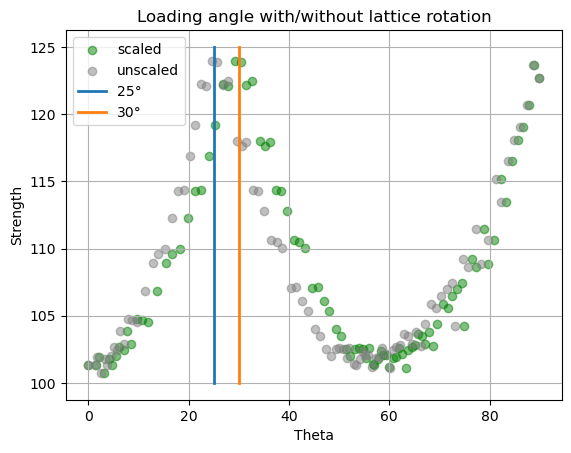

In [46]:
from filter_csv import filter_data
import local_config
import pandas as pd
import matplotlib.pyplot as plt

# ========== USER INTERFACE ==========
folder = f'{local_config.DATA_DIR}/rotation_tests'
csv_file = f"{folder}/all_simulations.csv"

exact_filters = {
    "Num Atoms x": 60,
    "Num Atoms y": 60,
    "Defects": "None",  # will match NaN or "None"
    # "Defect Percentage": 0.5,
    # "Defect Random Seed": 3,
    # "Theta Requested": 0
    # "Strain Rate x": 0.001,
    # "Strain Rate y": 0.001
}

range_filters = {
    # "Defect Percentage": (0.4, 0.6),
    # "Defect Random Seed": (0, 10)
    # "Theta Requested": (90, 90),
    # "Sigma_1": (4, 20)
}

or_filters = {
    # "Defect Type": ["SV", "DV"],
    # "Theta Requested": [0, 60]
}
# ====================================
df = pd.read_csv(csv_file)
filtered_df = filter_data(df, exact_filters=exact_filters, range_filters=range_filters, or_filters=or_filters, flip_strengths=False, shift_theta=False)

optimal_rows = []
for angle in range(0, 91, 1):
    this_df = filter_data(filtered_df, exact_filters={"Theta Requested": angle}, shift_theta=False)
    
    if this_df.empty:
        continue  # skip if no data for this angle

    this_df = this_df.copy()
    this_df["ratio"] = this_df["Strength_2"] / this_df["Strength_1"]

    # Find the row with the minimum ratio
    min_row = this_df.loc[this_df["ratio"].idxmin()]

    # Append the row to the list
    optimal_rows.append(min_row)

# Combine all optimal rows into a single DataFrame
unscaled_df = pd.DataFrame(optimal_rows)

final_df = unscaled_df.copy()
final_df["Theta"] = final_df["Theta"] - final_df["Rotation Angle"]  # apply deformation rotation fix


# plt.scatter(result["Theta Requested"], result["Strength_1"], color='blue', alpha=0.5)
plt.scatter(final_df["Theta"], final_df["Strength_1"], color='green', alpha=0.5, label="scaled")
plt.scatter(unscaled_df["Theta"], final_df["Strength_1"], color='grey', alpha=0.5, label="unscaled")
plt.plot([25, 25], [100, 125], lw=2, label="25°")
plt.plot([30, 30], [100, 125], lw=2, label="30°")

plt.xlabel("Theta")
plt.legend()
plt.ylabel("Strength")
plt.title("Loading angle with/without lattice rotation")
plt.grid()
plt.show


This is what we have now but up to 4th order harmonics. Does not get much better

[ 1.09380788e+02 -9.48608079e+00 -4.44485919e-02  2.38627306e+00
  3.40388909e-01 -1.04665634e+00 -3.22712416e-02  6.36843523e-01
 -1.00639573e-01]
RMSE: 0.8549929557317911


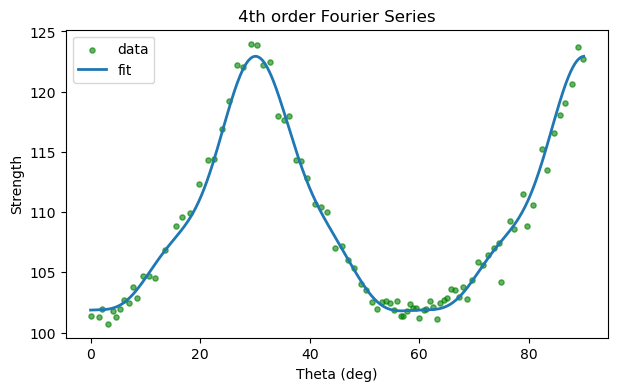

In [102]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# test data
df = final_df.copy()
theta_data = df["Theta"].to_numpy()
y_data = df["Strength_1"].to_numpy()

N = 4  # max harmonic order
x0 = np.zeros(2 * N + 1)  # initial guess


def k_model(theta_deg, params, N):
    """
    Generalized Fourier series up to order N.
    params: [k0, k1, k2, ..., k_{2N}]
        - k0: constant term
        - k_{2m-1}: cosine coefficient for m-th harmonic
        - k_{2m}: sine coefficient for m-th harmonic
    """
    w = 2 * np.pi * theta_deg / 60.0  # 60° period
    # w = 2 * np.pi * theta_deg / 180  # TO ENFORCE NO PERIODICITY
    k0 = params[0]
    total = np.full_like(theta_deg, k0, dtype=float)

    for m in range(1, N + 1):
        cos_coeff = params[2 * m - 1]
        sin_coeff = params[2 * m]
        total += cos_coeff * np.cos(m * w) + sin_coeff * np.sin(m * w)

    return total


# pin_indices = [np.argmax(y_data), np.argmin(y_data)]  # peak + valley
pin_indices = []
pin_weight = 1e6

def loss(params):
    pred = k_model(theta_data, params, N)
    sse = np.sum((y_data - pred)**2)

    pin_penalty = 0
    for idx in pin_indices:
        pin_penalty += (k_model(theta_data[idx], params, N) - y_data[idx])**2

    return sse + pin_weight * pin_penalty

# # loss = sum of squared residuals (same as in large-scale code)
# def loss(params):
#     residuals = y_data - k_model(theta_data, params, N)
#     return np.sum(residuals**2)

# fit using BFGS (same as your large-scale app) -- changed to powell
result = minimize(loss, x0, method="Powell")

if result.success:
    params_opt = result.x
    print(params_opt)
    pred = k_model(theta_data, params_opt, N)
    rmse = np.sqrt(np.mean((y_data - pred)**2))
    print("RMSE:", rmse)
else:
    raise RuntimeError(f"Fit failed: {result.message}")

# plot
theta_grid = np.linspace(0, 90, 721)
plt.figure(figsize=(7,4))
plt.scatter(theta_data, y_data, s=14, alpha=0.6, label="data", c='g')
plt.plot(theta_grid, k_model(theta_grid, params_opt, N), label="fit", linewidth=2)
plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.title(f"{N}th order Fourier Series")
plt.legend()
plt.show()


Spliced Quadratics:

Fit successful:
a = 23.1338, c = 101.6444
RMSE = 0.880598


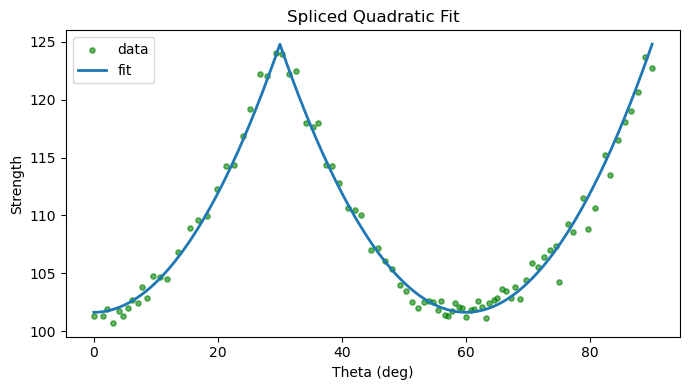

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Data
df = final_df.copy()
theta_data = df["Theta"].to_numpy()
y_data = df["Strength_1"].to_numpy()

# Restrict to [0, 90]
mask = (theta_data >= 0) & (theta_data <= 90)
theta_data = theta_data[mask]
y_data = y_data[mask]

def wrapped_distance(theta, center):
    return (theta - center + 180) % 360 - 180

def spliced_valley_quad(theta_deg, a, c):
    theta_deg = np.asarray(theta_deg)
    output = np.zeros_like(theta_deg, dtype=float)

    centers = [0, 60]

    for mu in centers:
        d = wrapped_distance(theta_deg, mu)
        mask = np.abs(d) <= 30
        output[mask] = a * (d[mask] / 30.0)**2 + c

    return output

# Loss function
def loss(params):
    a, c = params
    pred = spliced_valley_quad(theta_data, a, c)
    residuals = y_data - pred
    return np.sum(residuals**2)

# Initial guess
a0 = 1.0
c0 = np.min(y_data)
x0 = [a0, c0]

# Bounds
bounds = [(0, None),     # a > 0
          (None, None)]  # c free

# Fit
result = minimize(loss, x0, method="Powell", bounds=bounds)

if result.success:
    a, c = result.x
    rmse = np.sqrt(result.fun / y_data.size)
    print(f"Fit successful:\na = {a:.4f}, c = {c:.4f}\nRMSE = {rmse:.6g}")
else:
    raise RuntimeError("Fit failed: " + result.message)

# Plot
theta_grid = np.linspace(0, 90, 361)
fit_curve = spliced_valley_quad(theta_grid, a, c)

plt.figure(figsize=(7, 4))
plt.scatter(theta_data, y_data, s=14, alpha=0.6, label="data", c='g')
plt.plot(theta_grid, fit_curve, label="fit", linewidth=2)
plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.title("Spliced Quadratic Fit")
plt.legend()
plt.tight_layout()
plt.show()


Shifted Theta such that Theta[new] = Theta[old] - Rotation Angle.
The Total Loss is: 660.5554533680869


/tmp/ipykernel_1273822/2497692580.py:114: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


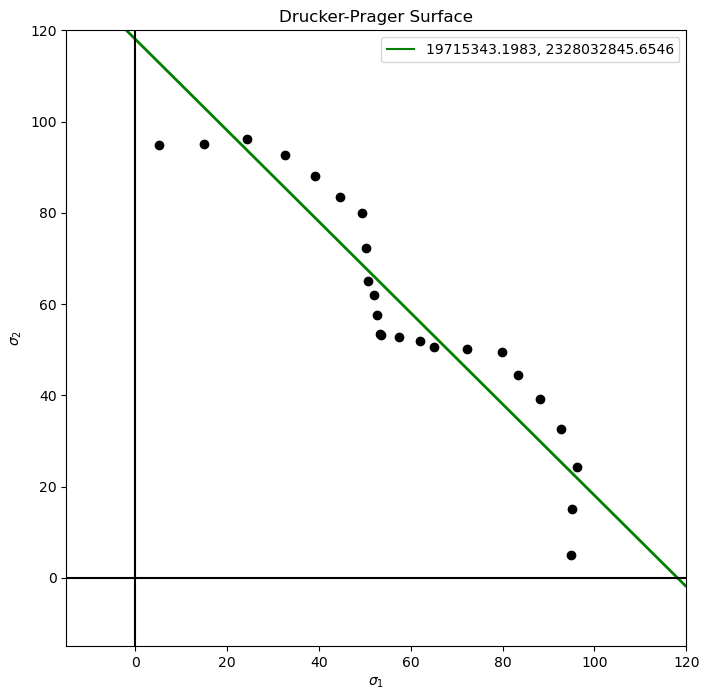

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from filter_csv import filter_data
import pandas as pd
import local_config

df = pd.read_csv(f"{local_config.DATA_DIR}/rotation_tests/all_simulations.csv")

exact_filters = {
    "Defects": "{\"DV\": 0.5}",
    "Defect Random Seed": 54,
    "Theta Requested": 90
}

filtered_df = filter_data(df, exact_filters=exact_filters, flip_strengths=True, duplic_freq=(0, 91, 10), only_uniaxial=False, remove_dupes=True)


grid = np.linspace(-10, 120, 1000)

# Create sigma1, sigma2 grid
sig1, sig2 = np.meshgrid(grid, grid)
sig3 = np.zeros_like(sig1)  

# Compute I1 and sqrt(J2)
i1 = sig1 + sig2 + sig3
mean_stress = i1 / 3
dev_xx = sig1 - mean_stress
dev_yy = sig2 - mean_stress
dev_zz = sig3 - mean_stress

j2 = 0.5 * (dev_xx**2 + dev_yy**2 + dev_zz**2)

def plot_dp(a, k, col, ax):
    F = np.sqrt(j2) + a * i1 - k
    ax.contour(sig1, sig2, F, levels=[0], colors=col, linewidths=2)
    ax.plot([], [], color=col, label=f"{a}, {k}")  # for legend 

def calculate_invariants(point):
    sigma = np.diagflat([point[0], point[1], point[2]])
    i1 = np.trace(sigma)  # tr(sigma)
    dev_stress = sigma - (1 / 3) * i1 * np.identity(3)
    dev2 = dev_stress @ dev_stress
    j2 = 0.5 * np.trace(dev2)
    return i1, j2

def dp(point, params, return_invariants=False):

    alpha = params[0]
    k = params[1]
    i1, j2 = calculate_invariants(point)

    dp = np.sqrt(j2) + alpha * i1 - k
    if return_invariants:
        return dp, i1, j2
    else:
        return dp

def dp_stress_distance(point, params, eps=1e-12):
    alpha, k = params
    s1 = float(point[0])
    s2 = float(point[1])
    s3 = float(point[2])

    F, I1, J2 = dp(point, params, return_invariants=True)
    J2 = (s1*s1 + s2*s2 + s3*s3 - s1*s2 - s2*s3 - s3*s1) / 3.0
    q = max(np.sqrt(J2), eps)  # protect against J2 = 0
    dF_dsig1 = (2.0*s1 - s2 - s3) / (6.0*q) + alpha
    dF_dsig2 = (2.0*s2 - s3 - s1) / (6.0*q) + alpha
    dF_dsig3 = (2.0*s3 - s1 - s2) / (6.0*q) + alpha
    grad_norm = np.sqrt(dF_dsig1*dF_dsig1 + dF_dsig2*dF_dsig2 + dF_dsig3*dF_dsig3)
    return F / max(grad_norm, 1e-9)  # signed normal distance

def loss(df, params, return_resid=False):
    resid = [dp_stress_distance([row["Strength_1"], row["Strength_2"], row["Strength_3"]], params) for _, row in df.iterrows()]
    return resid if return_resid else float(np.sum(np.square(resid)))
    
# alpha_test = 0.8
# k_test = 140

alpha_test = 19715343.1983
k_test = 2328032845.6546

print("The Total Loss is:", loss(filtered_df, [alpha_test, k_test]))

fig, ax = plt.subplots(figsize=(8, 8))

# plot_dp(-0.2, 30, "red", ax)
# plot_dp(-0.1, 30, "orange", ax)
# plot_dp(0.0, 30, "yellow", ax)
# plot_dp(0.1, 30, "green", ax)
# plot_dp(0.2, 30, "blue", ax)

# plot_dp(0, 20, "red", ax)
# plot_dp(0, 30, "orange", ax)
plot_dp(alpha_test, k_test, "green", ax)
# plot_dp(0, 50, "green", ax)
# plot_dp(0, 60, "blue", ax)


ax.plot([-50, 130], [0, 0], color='black')
ax.plot([0, 0], [-50, 130], color='black')

ax.scatter(filtered_df["Strength_1"], filtered_df["Strength_2"], color='k')

ax.set_xlabel(r"$\sigma_1$")
ax.set_ylabel(r"$\sigma_2$")

ax.set_xlim(-15, 120)
ax.set_ylim(-15, 120)

ax.set_title(f"Drucker-Prager Surface")
ax.legend()

fig.show()

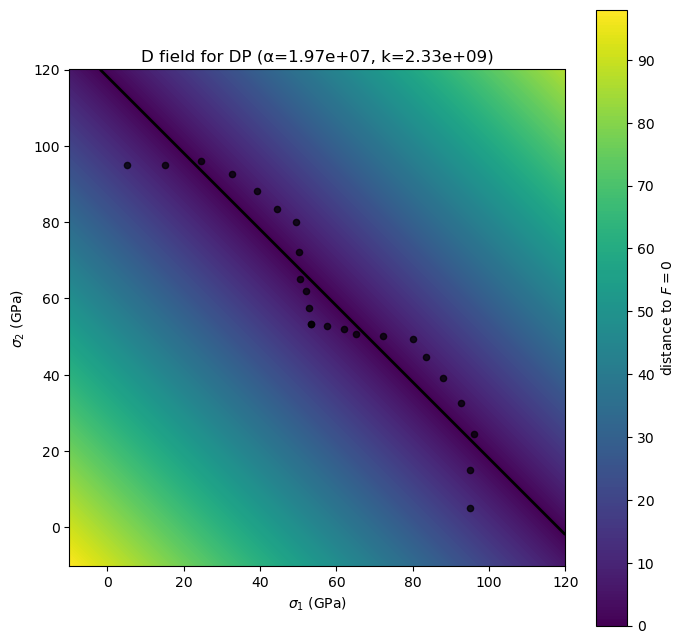

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# ----- grid in stress space -----
grid = np.linspace(-10.0, 120.0, 600)
sig1, sig2 = np.meshgrid(grid, grid)
sig3 = np.zeros_like(sig1)  # plane stress; change if needed

# ----- DP field and distance field -----
def F_field(sig1, sig2, sig3, alpha, k, eps=1e-12):
    J2 = (sig1**2 + sig2**2 + sig3**2 - sig1*sig2 - sig2*sig3 - sig3*sig1) / 3.0
    q  = np.sqrt(np.maximum(J2, eps))
    I1 = sig1 + sig2 + sig3
    return q + alpha*I1 - k

def distance_field(sig1, sig2, sig3, alpha, k, eps=1e-12):
    # DP value
    F = F_field(sig1, sig2, sig3, alpha, k, eps)
    # pieces for gradient in-plane
    J2 = (sig1**2 + sig2**2 + sig3**2 - sig1*sig2 - sig2*sig3 - sig3*sig1) / 3.0
    q  = np.sqrt(np.maximum(J2, eps))
    dF_dsig1 = (2.0*sig1 - sig2 - sig3) / (6.0*q) + alpha
    dF_dsig2 = (2.0*sig2 - sig3 - sig1) / (6.0*q) + alpha
    grad_norm = np.sqrt(dF_dsig1**2 + dF_dsig2**2)
    grad_norm = np.maximum(grad_norm, 1e-12)
    return np.abs(F) / grad_norm   # unsigned distance field

# ----- plot -----
def plot_dp_distance_field(ax, alpha, k, scatter_df=None, title=None):
    # compute fields
    D = distance_field(sig1, sig2, sig3, alpha, k)
    F = F_field(sig1, sig2, sig3, alpha, k)

    # filled contour of the distance (looks "continuous" with many levels)
    cs = ax.contourf(sig1, sig2, D, levels=200)
    cbar = ax.figure.colorbar(cs, ax=ax)
    cbar.set_label(r'distance to $F=0$')

    # overlay the DP curve
    ax.contour(sig1, sig2, F, levels=[0.0], colors='k', linewidths=2)

    # optional: scatter your MD points
    if scatter_df is not None:
        ax.scatter(scatter_df["Strength_1"], scatter_df["Strength_2"], s=20, color='k', alpha=0.75)

    # axes cosmetics
    ax.set_xlabel(r'$\sigma_1$ (GPa)')
    ax.set_ylabel(r'$\sigma_2$ (GPa)')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(grid.min(), grid.max()); ax.set_ylim(grid.min(), grid.max())
    if title:
        ax.set_title(title)

# example use
# alpha_test = -0.36
# k_test = -3
alpha_test = 19715343.1983
k_test = 2328032845.6546


fig, ax = plt.subplots(figsize=(8,8))
plot_dp_distance_field(ax, alpha_test, k_test, scatter_df=filtered_df,
                       title=f'D field for DP (α={alpha_test:.3g}, k={k_test:.3g})')
plt.show()


### Here are some plots of the $\alpha$ and $k$ distributions in different scenarios.

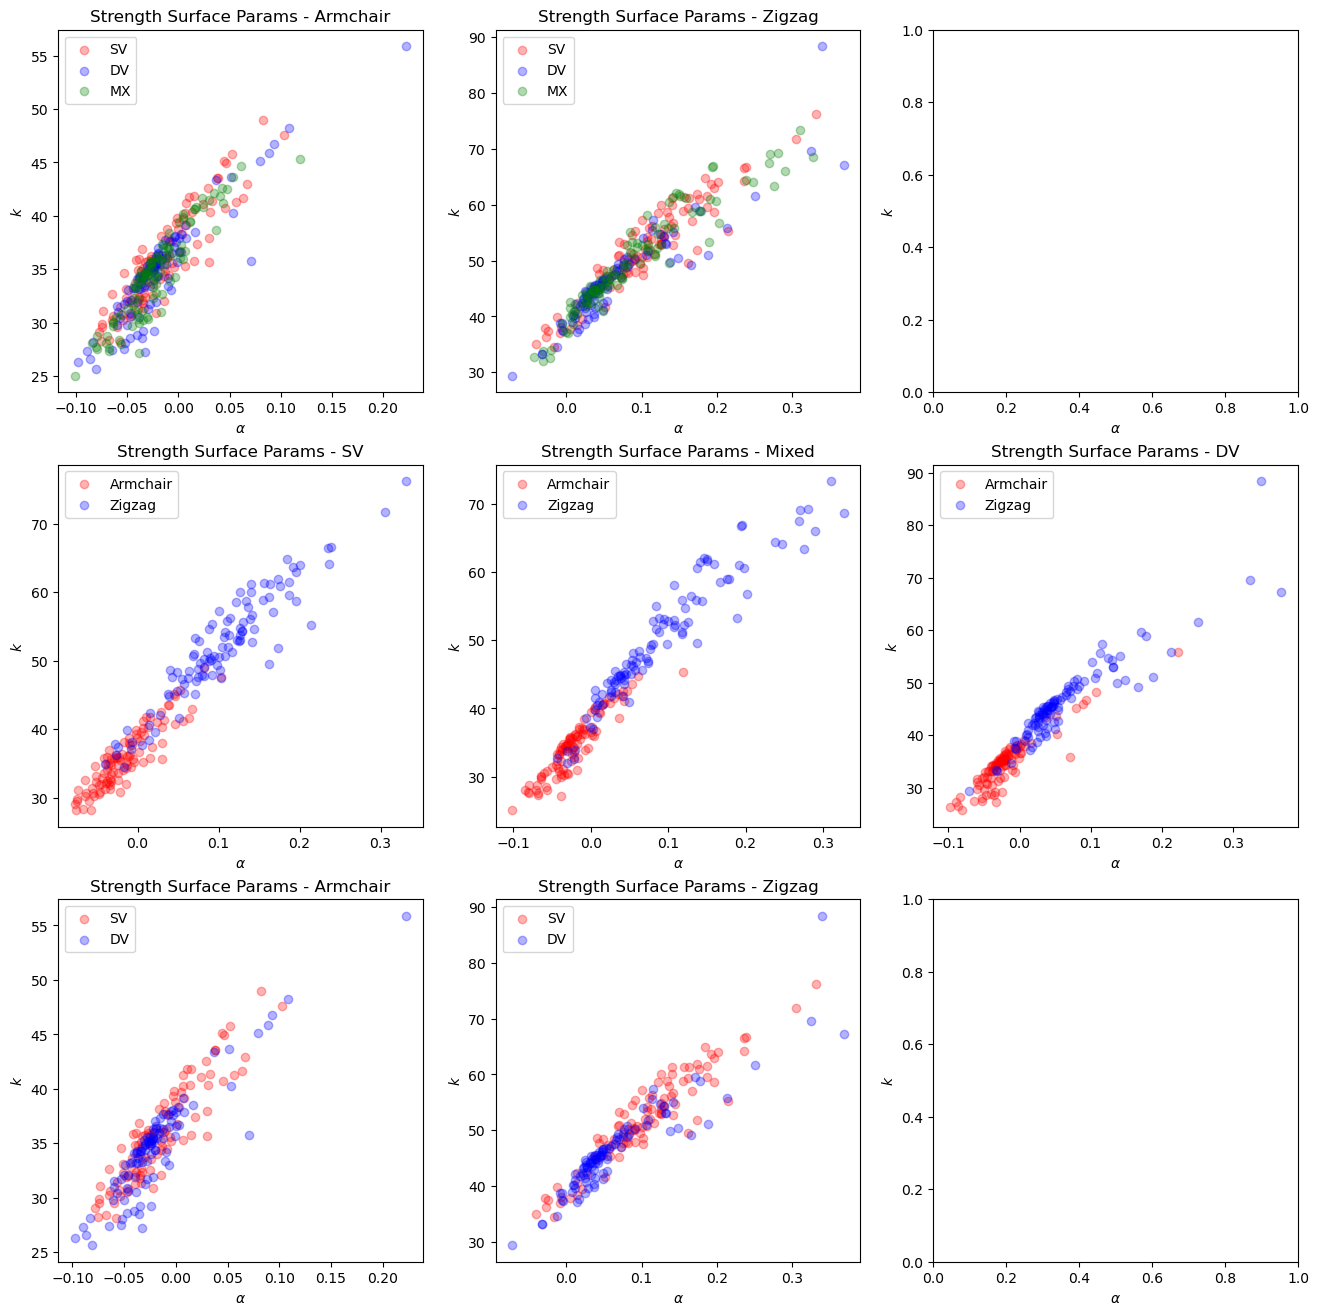

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import local_config
import numpy as np

ac_sv = pd.read_csv(f"DPparams_AC_SV.csv")
ac_dv = pd.read_csv(f"DPparams_AC_DV.csv")
ac_mx = pd.read_csv(f"DPparams_AC_MX.csv")
zz_sv = pd.read_csv(f"DPparams_ZZ_SV.csv")
zz_dv = pd.read_csv(f"DPparams_ZZ_DV.csv")
zz_mx = pd.read_csv(f"DPparams_ZZ_MX.csv")

mask = (zz_dv["k"] < 100)
zz_dv = zz_dv.loc[mask].copy()

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
for ax in np.ndarray.flatten(axs):
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$k$")

axs[0, 0].scatter(ac_sv["alpha"], ac_sv["k"], color='r', alpha=0.3, label='SV')
axs[0, 0].scatter(ac_dv["alpha"], ac_dv["k"], color='b', alpha=0.3, label='DV')
axs[0, 0].scatter(ac_mx["alpha"], ac_mx["k"], color='g', alpha=0.3, label='MX')
axs[0, 0].legend()
axs[0, 0].set_title("Strength Surface Params - Armchair")

axs[0, 1].scatter(zz_sv["alpha"], zz_sv["k"], color='r', alpha=0.3, label='SV')
axs[0, 1].scatter(zz_dv["alpha"], zz_dv["k"], color='b', alpha=0.3, label='DV')
axs[0, 1].scatter(zz_mx["alpha"], zz_mx["k"], color='g', alpha=0.3, label='MX')
axs[0, 1].legend()
axs[0, 1].set_title("Strength Surface Params - Zigzag")

axs[1, 0].scatter(ac_sv["alpha"], ac_sv["k"], color='r', alpha=0.3, label='Armchair')
axs[1, 0].scatter(zz_sv["alpha"], zz_sv["k"], color='b', alpha=0.3, label='Zigzag')
axs[1, 0].legend()
axs[1, 0].set_title("Strength Surface Params - SV")

axs[1, 1].scatter(ac_mx["alpha"], ac_mx["k"], color='r', alpha=0.3, label='Armchair')
axs[1, 1].scatter(zz_mx["alpha"], zz_mx["k"], color='b', alpha=0.3, label='Zigzag')
axs[1, 1].legend()
axs[1, 1].set_title("Strength Surface Params - Mixed")

axs[1, 2].scatter(ac_dv["alpha"], ac_dv["k"], color='r', alpha=0.3, label='Armchair')
axs[1, 2].scatter(zz_dv["alpha"], zz_dv["k"], color='b', alpha=0.3, label='Zigzag')
axs[1, 2].legend()
axs[1, 2].set_title("Strength Surface Params - DV")

axs[2, 0].scatter(ac_sv["alpha"], ac_sv["k"], color='r', alpha=0.3, label='SV')
axs[2, 0].scatter(ac_dv["alpha"], ac_dv["k"], color='b', alpha=0.3, label='DV')
axs[2, 0].legend()
axs[2, 0].set_title("Strength Surface Params - Armchair")

axs[2, 1].scatter(zz_sv["alpha"], zz_sv["k"], color='r', alpha=0.3, label='SV')
axs[2, 1].scatter(zz_dv["alpha"], zz_dv["k"], color='b', alpha=0.3, label='DV')
axs[2, 1].legend()
axs[2, 1].set_title("Strength Surface Params - Zigzag")

plt.show()

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, fixed
from scipy.stats import gaussian_kde
import local_config
from filter_csv import filter_data
from IPython.display import clear_output

df = pd.read_csv(f"{local_config.DATA_DIR}/rotation_tests/all_simulations.csv")

N = 2
defs = "MX"
modifier = ""  # can be nothing, _quad, or _NP

if defs == "MX":
    exact_filters = {
        "Defects": '{"DV": 0.25, "SV": 0.25}',
        # "Defect Random Seed": 54,
        # "Theta Requested": 90
    }
else:
    exact_filters = {
        "Defects": f'{{"{defs}": 0.5}}',
        # "Defect Random Seed": 54,
        # "Theta Requested": 90
    }

filtered_df = filter_data(df, exact_filters=exact_filters, flip_strengths=True, duplic_freq=(0, 91, 10), remove_dupes=True)

df_params = pd.read_csv(f"DPparams_3D_{defs}{N}{modifier}.csv")
# df_params = pd.read_csv("test.csv")

# dynamically detect all alpha and k columns
alpha_cols = [col for col in df_params.columns if col.startswith("a")]
k_cols = [col for col in df_params.columns if col.startswith("k")]

# sort them to ensure proper order (a0, a1, ..., not a1, a10, a2)
alpha_cols = sorted(alpha_cols, key=lambda x: int(x[1:]))
k_cols = sorted(k_cols, key=lambda x: int(x[1:]))

# convert to numpy arrays
alphas = df_params[alpha_cols].to_numpy()
ks = df_params[k_cols].to_numpy()


def fourier_eval(params, N, theta_deg):
    """Compute Fourier series f(theta) = a0 + Σ[a_cos cos + a_sin sin]."""
    omega = 2 * np.pi * theta_deg / 60.0   # periodic over [0, 60]
    f = params[0]
    for m in range(1, N + 1):
        cos_coeff = params[2*m - 1]
        sin_coeff = params[2*m]
        f += cos_coeff * np.cos(m * omega) + sin_coeff * np.sin(m * omega)
    return f

def quad_eval(params, theta_deg, centers=(0, 60), halfwidth=30.0):
    theta_deg = np.atleast_1d(theta_deg).astype(float)  # ensures array
    output = np.zeros(theta_deg.shape, dtype=float)
    for mu in centers:
        d = (theta_deg - mu + 180) % 360 - 180
        mask = np.abs(d) <= halfwidth
        output[mask] = params[0] * (d[mask] / halfwidth)**2 + params[1]
    return output[0] if output.size == 1 else output

def plot_ak_param(ax, params, current_theta, N=None, lab=None, color='k', show_current_theta=True):
    thetas = np.linspace(0, 90, 200)
    if N is None:
        y = quad_eval(params, thetas)
    else:
        y = fourier_eval(params, N, thetas) #########
    ax.plot(thetas, y, color=color, alpha=0.8, label=lab)
    if show_current_theta:
        ax.plot([current_theta, current_theta], [-1, 71], color='green', linewidth=1, label='Current Theta')


def plot_dp(alphas, ks, index, N=None, real_data=None, current_theta=0):
    alpha_coeffs = alphas[index]
    k_coeffs = ks[index]

    theta_buffer = 4

    if N is None:
        current_alpha = quad_eval(alpha_coeffs, current_theta)
        current_k = quad_eval(k_coeffs, current_theta)
    else:
        current_alpha = fourier_eval(alpha_coeffs, N, current_theta)
        current_k = fourier_eval(k_coeffs, N, current_theta)

    grid = np.linspace(-20.0, 120.0, 600)
    sig1, sig2 = np.meshgrid(grid, grid)
    sig3 = np.zeros_like(sig1)
    i1 = sig1 + sig2 + sig3
    j2 = (sig1**2 + sig2**2 + sig3**2 - sig1*sig2 - sig2*sig3 - sig3*sig1) / 3.0

    F = np.sqrt(j2) + current_alpha * i1 - current_k
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

    axs[0].contour(sig1, sig2, F, levels=[0], linewidths=2, colors='blue')  # F=0 curve
    axs[0].plot([], [], color="blue", label='Slice of 3D Surface')  # for legend
    axs[0].axhline(0, color='black', linewidth=1)
    axs[0].axvline(0, color='black', linewidth=1)
    axs[0].set_xlim(-20, 100); axs[0].set_ylim(-20, 100)
    axs[0].set_xlabel(r"$\sigma_1$")
    axs[0].set_ylabel(r"$\sigma_2$")
    axs[0].set_title(f"Drucker-Prager Surface  (α={current_alpha:.2f},  k={current_k:.1f})")

    current_seed_df = filter_data(real_data, exact_filters={"Defect Random Seed": index}, shift_theta=False)

    if real_data is not None:
        df = filter_data(current_seed_df, range_filters={"Theta": (current_theta-theta_buffer, current_theta+theta_buffer)}, shift_theta=False)
        try:
            axs[0].scatter(df["Strength_1"], df["Strength_2"], color='green', alpha=(abs(df["Theta"]-current_theta) - theta_buffer) / -theta_buffer, label=f'MD Data +/- {theta_buffer}°')
        except ValueError:
            axs[0].scatter([], [], color="green", label=f'MD Data +/- {theta_buffer}°')

    axs[0].legend()

    plot_ak_param(axs[1], alpha_coeffs, current_theta, N, lab="alpha")
    plot_ak_param(axs[2], k_coeffs, current_theta, N, lab="k")

    axs[1].set_xlabel("theta")
    axs[1].set_ylabel("alpha")
    axs[1].set_title(f"Alpha vs Theta")
    axs[1].grid(alpha=0.3)
    axs[1].set_ylim(-0.2, 0.3)
    
    axs[2].set_xlabel("theta")
    axs[2].set_ylabel("k")
    axs[2].set_title(f"k vs Theta")
    axs[2].grid(alpha=0.3)
    axs[2].set_ylim(20, 70)

    plot_theta_kde(axs[1], current_seed_df)
    plot_theta_kde(axs[2], current_seed_df)

    axs[1].legend()
    axs[2].legend()

    plt.show(fig)

def plot_theta_kde(ax, df):
    # compute KDE over 0–90 range
    theta_vals = np.linspace(0, 90, 200)
    theta_data = df["Theta"].dropna()
    kde = gaussian_kde(theta_data)
    kde.set_bandwidth(bw_method=kde.factor / 25)
    density = kde(theta_vals)

    # normalize the density so it fits nicely at the bottom (say bottom 20%)
    ymin, ymax = ax.get_ylim()
    scale = 0.2 * (ymax - ymin)
    density_scaled = ymin + density / np.max(density) * scale

    # plot the KDE line at the bottom of the alpha plot
    ax.fill_between(theta_vals, ymin, density_scaled, color="green", alpha=0.2)
    ax.plot(theta_vals, density_scaled, color="green", linewidth=1, alpha=0.4, label="Theta Density")

theta_slider = FloatSlider(description='Theta', min=0, max=90, step=1, value=0, readout_format='.0f')
index_slider = IntSlider(description='Defect Seed', min=0, max=len(alphas)-1, step=1, value=0)
if modifier == "_quad":
    interact(plot_dp, alphas=fixed(alphas), ks=fixed(ks), real_data=fixed(filtered_df), N=fixed(None), index=index_slider, current_theta=theta_slider)
else:
    interact(plot_dp, alphas=fixed(alphas), ks=fixed(ks), real_data=fixed(filtered_df), N=fixed(N), index=index_slider, current_theta=theta_slider)



Shifted Theta such that Theta[new] = Theta[old] - Rotation Angle.


interactive(children=(IntSlider(value=0, description='Defect Seed'), FloatSlider(value=0.0, description='Theta…

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, fixed
from scipy.stats import gaussian_kde
import local_config
from filter_csv import filter_data
from IPython.display import clear_output

df = pd.read_csv(f"{local_config.DATA_DIR}/rotation_tests/all_simulations.csv")

N = 2
defs = "MX"
# modifier = "_quad"  # can be nothing, _quad, or _NP

if defs == "MX":
    exact_filters = {
        "Defects": '{"DV": 0.25, "SV": 0.25}',
        # "Defect Random Seed": 54,
        # "Theta Requested": 90
    }
else:
    exact_filters = {
        "Defects": f'{{"{defs}": 0.5}}',
        # "Defect Random Seed": 54,
        # "Theta Requested": 90
    }


def extract_alphak(df_params):
    # dynamically detect all alpha and k columns
    alpha_cols = [col for col in df_params.columns if col.startswith("a")]
    k_cols = [col for col in df_params.columns if col.startswith("k")]

    # sort them to ensure proper order (a0, a1, ..., not a1, a10, a2)
    alpha_cols = sorted(alpha_cols, key=lambda x: int(x[1:]))
    k_cols = sorted(k_cols, key=lambda x: int(x[1:]))

    # convert to numpy arrays
    alphas = df_params[alpha_cols].to_numpy()
    ks = df_params[k_cols].to_numpy()
    return alphas, ks


def plot_dp(alphas, ks, index, axs, color, lab=None, N=None, current_theta=0, show_theta=True):
    alpha_coeffs = alphas[index]
    k_coeffs = ks[index]

    if N is None:
        current_alpha = quad_eval(alpha_coeffs, current_theta)
        current_k = quad_eval(k_coeffs, current_theta)
    else:
        current_alpha = fourier_eval(alpha_coeffs, N, current_theta)
        current_k = fourier_eval(k_coeffs, N, current_theta)

    grid = np.linspace(-20.0, 120.0, 600)
    sig1, sig2 = np.meshgrid(grid, grid)
    sig3 = np.zeros_like(sig1)
    i1 = sig1 + sig2 + sig3
    j2 = (sig1**2 + sig2**2 + sig3**2 - sig1*sig2 - sig2*sig3 - sig3*sig1) / 3.0

    F = np.sqrt(j2) + current_alpha * i1 - current_k

    axs[0].contour(sig1, sig2, F, levels=[0], linewidths=2, colors=color)  # F=0 curve
    axs[0].plot([], [], color=color, label=lab)  # for legend

    plot_ak_param(axs[1], alpha_coeffs, current_theta, N, lab=f"alpha: {lab}", color=color, show_current_theta=show_theta)
    plot_ak_param(axs[2], k_coeffs, current_theta, N, lab=f"k: {lab}",  color=color, show_current_theta=show_theta)


def plot_all(alphas, ks, index, real_data=None, current_theta=0):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
    plot_dp(alphas[0], ks[0], index, axs, color='red', lab=f'2nd Order Fourier', N=2, current_theta=current_theta, show_theta=False)
    plot_dp(alphas[1], ks[1], index, axs, color='blue', lab='Spliced Quadratics', N=None, current_theta=current_theta)

    theta_buffer = 4

    axs[0].axhline(0, color='black', linewidth=1)
    axs[0].axvline(0, color='black', linewidth=1)
    axs[0].set_xlim(-20, 100); axs[0].set_ylim(-20, 100)
    axs[0].set_xlabel(r"$\sigma_1$")
    axs[0].set_ylabel(r"$\sigma_2$")
    axs[0].set_title(f"Drucker-Prager Surface")

    axs[1].set_xlabel("theta")
    axs[1].set_ylabel("alpha")
    axs[1].set_title(f"Alpha vs Theta")
    axs[1].grid(alpha=0.3)
    axs[1].set_ylim(-0.2, 0.3)
    
    axs[2].set_xlabel("theta")
    axs[2].set_ylabel("k")
    axs[2].set_title(f"k vs Theta")
    axs[2].grid(alpha=0.3)
    axs[2].set_ylim(20, 70)

    current_seed_df = filter_data(real_data, exact_filters={"Defect Random Seed": index}, shift_theta=False)

    if real_data is not None:
        df = filter_data(current_seed_df, range_filters={"Theta": (current_theta-theta_buffer, current_theta+theta_buffer)}, shift_theta=False)
        try:
            axs[0].scatter(df["Strength_1"], df["Strength_2"], color='green', alpha=(abs(df["Theta"]-current_theta) - theta_buffer) / -theta_buffer, label=f'MD Data +/- {theta_buffer}°')
        except ValueError:
            axs[0].scatter([], [], color="green", label=f'MD Data +/- {theta_buffer}°')

    axs[0].legend()

    plot_theta_kde(axs[1], current_seed_df)
    plot_theta_kde(axs[2], current_seed_df)

    axs[1].legend()
    axs[2].legend()
    plt.show(fig)

filtered_df = filter_data(df, exact_filters=exact_filters, flip_strengths=True, duplic_freq=(0, 91, 10), remove_dupes=True)

df_params_quad = pd.read_csv(f"DPparams_3D_{defs}2_quad.csv")
df_params2 = pd.read_csv(f"DPparams_3D_{defs}2.csv")
alphas_quad, ks_quad = extract_alphak(df_params_quad)
alphas2, ks2 = extract_alphak(df_params2)

alphas = [alphas2, alphas_quad]
ks = [ks2, ks_quad]

theta_slider = FloatSlider(description='Theta', min=0, max=90, step=1, value=0, readout_format='.0f')
index_slider = IntSlider(description='Defect Seed', min=0, max=len(alphas[0])-1, step=1, value=0)
interact(plot_all, alphas=fixed(alphas), ks=fixed(ks), real_data=fixed(filtered_df), index=index_slider, current_theta=theta_slider)


Shifted Theta such that Theta[new] = Theta[old] - Rotation Angle.


interactive(children=(IntSlider(value=0, description='Defect Seed'), FloatSlider(value=0.0, description='Theta…

<function __main__.plot_all(alphas, ks, index, real_data=None, current_theta=0)>

Fraction of total variance explained when using k components:
 [0.38334 0.69853 0.85061 0.92624 0.9826  0.99446 0.99769 0.99891 0.99963
 1.     ]
Ratio of unexplained to explained variance after keeping k components:
 [1.60863 0.43158 0.17563 0.07964 0.0177  0.00557 0.00231 0.00109 0.00037
 0.     ]


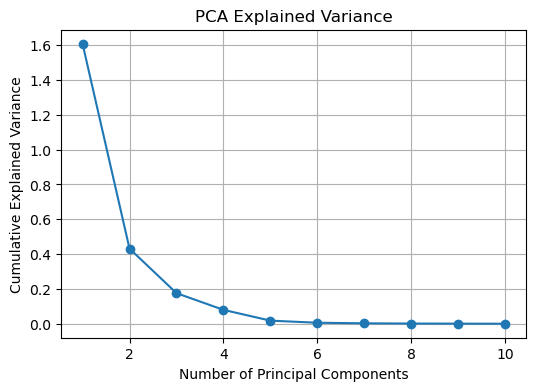

Eigenvalues: [3.87177 3.1834  1.53595 0.76387 0.56933 0.11977]
Explained variance ratio: [0.38334 0.31519 0.15207 0.07563 0.05637 0.01186]
So basically, when keeping 6 bases, we can explain 99.446% of the variance, which means we don't explain 0.557% of the variance


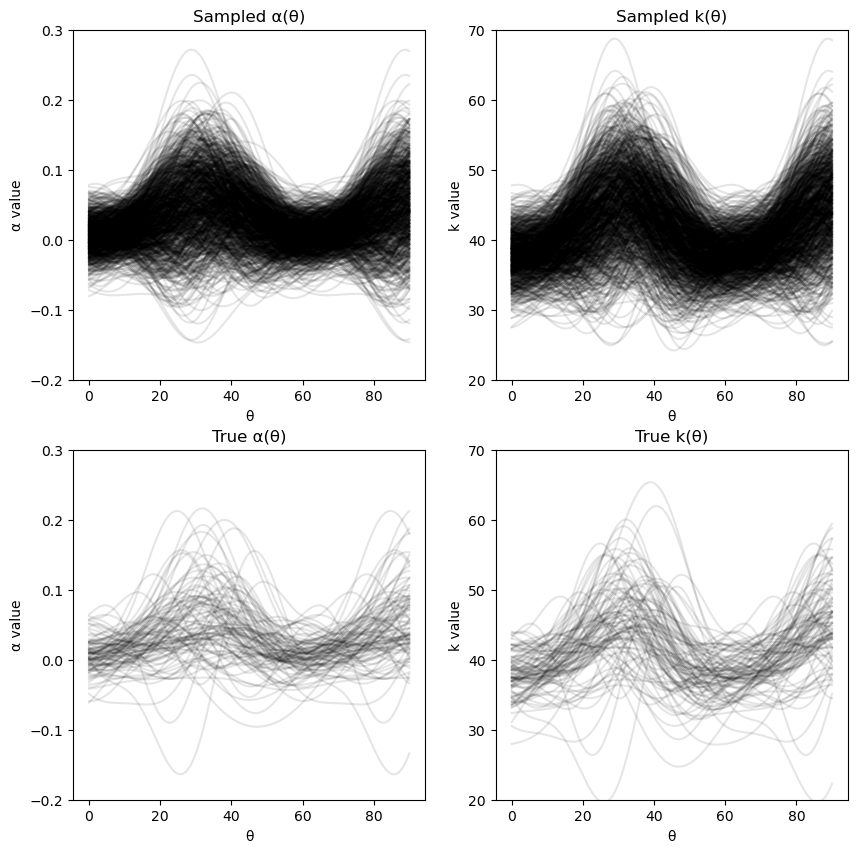

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.random import multivariate_normal

df = pd.read_csv("DPparams_3D_MX2.csv")
X = df.drop(columns=["Defect Random Seed"])

# standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# plot explained variance ratio (eigenvalues)

np.set_printoptions(precision=5, suppress=True)


y = (1 - np.cumsum(pca.explained_variance_ratio_)) / np.cumsum(pca.explained_variance_ratio_)
print('Fraction of total variance explained when using k components:\n', np.cumsum(pca.explained_variance_ratio_))
print('Ratio of unexplained to explained variance after keeping k components:\n', y)
plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_)+1), y, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

n_components = 6
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# print eigenvalues and explained variance
print("Eigenvalues:", pca.explained_variance_)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("So basically, when keeping 6 bases, we can explain 99.446% of the variance, which means we don't explain 0.557% of the variance")

# now fit MV normal in latent space:
mu = X_pca.mean(axis=0)
Sigma = np.cov(X_pca, rowvar=False)
n_samples = 1000
samples_pca = multivariate_normal(mu, Sigma, size=n_samples)
# inverse PCA transform (back to standardized space)
samples_scaled = pca.inverse_transform(samples_pca)
# inverse standardization (back to physical coefficient scale)
samples_original = scaler.inverse_transform(samples_scaled)

def fourier_reconstruct(coeffs, theta):
    omega = 2 * np.pi * theta / 60.0
    # assuming 5 coefficients per function
    a0, a1, a2, a3, a4 = coeffs
    return (a0
            + a1*np.cos(omega)
            + a2*np.sin(omega)
            + a3*np.cos(2*omega)
            + a4*np.sin(2*omega))

theta = np.linspace(0, 90, 200)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i in range(1000):  # plot a few samples
    a_coeffs = samples_original[i, :5]
    k_coeffs = samples_original[i, 5:]
    alpha = fourier_reconstruct(a_coeffs, theta)
    k     = fourier_reconstruct(k_coeffs, theta)

    axs[0, 0].plot(theta, alpha, label=f'α sample {i+1}', c='k', alpha=0.1)
    axs[0, 1].plot(theta, k, label=f'k sample {i+1}', c='k', alpha=0.1)
    if i < 100:
        alpha_real = fourier_reconstruct(X.to_numpy()[i, :5], theta)
        k_real = fourier_reconstruct(X.to_numpy()[i, 5:], theta)
        axs[1, 0].plot(theta, alpha_real, label=f'α true {i+1}', c='k', alpha=0.1)
        axs[1, 1].plot(theta, k_real, label=f'k true {i+1}', c='k', alpha=0.1)

# plt.legend()
axs[0, 0].set_xlabel("θ")
axs[0, 0].set_ylabel("α value")
axs[0, 0].set_title("Sampled α(θ)")
axs[0, 0].set_ylim(-0.2, 0.3)
axs[0, 1].set_xlabel("θ")
axs[0, 1].set_ylabel("k value")
axs[0, 1].set_title("Sampled k(θ)")
axs[0, 1].set_ylim(20, 70)

axs[1, 0].set_xlabel("θ")
axs[1, 0].set_ylabel("α value")
axs[1, 0].set_title("True α(θ)")
axs[1, 0].set_ylim(-0.2, 0.3)
axs[1, 1].set_xlabel("θ")
axs[1, 1].set_ylabel("k value")
axs[1, 1].set_title("True k(θ)")
axs[1, 1].set_ylim(20, 70)
plt.show()

# Now we must do this with the z's

[-0.00000  0.00000  0.00000  0.00000 -0.00000  0.00000]
[[ 4.29517  0.00000 -0.00000  0.00000  0.00000 -0.00000]
 [ 0.00000  2.99944  0.00000  0.00000  0.00000 -0.00000]
 [-0.00000  0.00000  1.32369  0.00000 -0.00000 -0.00000]
 [ 0.00000  0.00000  0.00000  0.71872  0.00000 -0.00000]
 [ 0.00000  0.00000 -0.00000  0.00000  0.57691  0.00000]
 [-0.00000 -0.00000 -0.00000 -0.00000  0.00000  0.11420]]


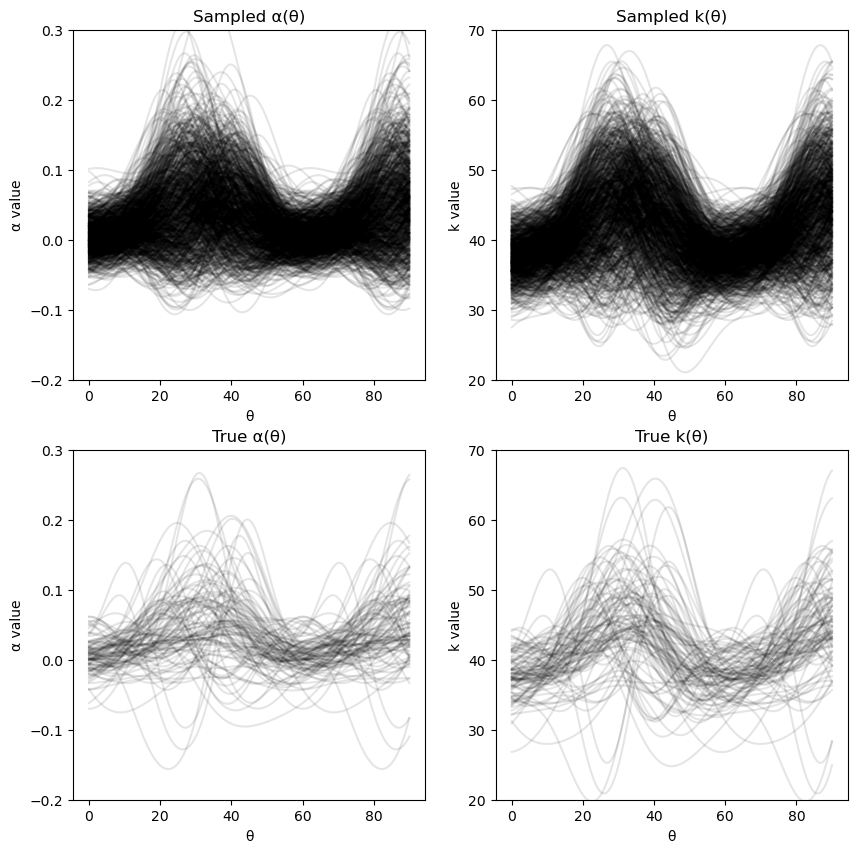

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.random import multivariate_normal

df = pd.read_csv("zs_MX2_softplus.csv")
zs = df.drop(columns=["Defect Random Seed"])

# standardize data
scaler = StandardScaler()
z_scaled = scaler.fit_transform(zs)

# pca = PCA()
# z_pca = pca.fit_transform(z_scaled)


# np.set_printoptions(precision=5, suppress=True)


# y = (1 - np.cumsum(pca.explained_variance_ratio_)) / np.cumsum(pca.explained_variance_ratio_)
# print('Fraction of total variance explained when using k components:\n', np.cumsum(pca.explained_variance_ratio_))
# print('Ratio of unexplained to explained variance after keeping k components:\n', y)
# plt.figure(figsize=(6,4))
# plt.plot(range(1, len(pca.explained_variance_)+1), y, marker='o')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('PCA Explained Variance')
# plt.grid(True)
# plt.show()

n_components = 6
pca = PCA(n_components=n_components)
z_pca = pca.fit_transform(z_scaled)

# # print eigenvalues and explained variance
# print("Eigenvalues:", pca.explained_variance_)
# print("Explained variance ratio:", pca.explained_variance_ratio_)

# now fit MV normal in latent space:
mu = z_pca.mean(axis=0)
print(mu)
Sigma = np.cov(z_pca, rowvar=False)
print(Sigma)
n_samples = 1000000
samples_pca = multivariate_normal(mu, Sigma, size=n_samples)
# inverse PCA transform (back to standardized space)
samples_scaled = pca.inverse_transform(samples_pca)
# inverse standardization (back to physical coefficient scale)
samples_z = scaler.inverse_transform(samples_scaled)

def get_alpha_k(params, theta, N, return_k=True):
    omega = 2 * np.pi * theta / 60

    z_alpha = params[0]
    z_k = params[2*N+1]

    for m in range(1, N + 1):
        cos_coeff_a = params[2 * m - 1]
        sin_coeff_a = params[2 * m]
        z_alpha += cos_coeff_a * np.cos(m * omega) + sin_coeff_a * np.sin(m * omega)
        if return_k:
            cos_coeff_k = params[(2*N+1)+(2 * m - 1)]
            sin_coeff_k = params[(2*N+1)+(2 * m)]
            z_k += cos_coeff_k * np.cos(m * omega) + sin_coeff_k * np.sin(m * omega)
    
    # once we have the value of z_alpha and z_k, we must transform back to alpha and k:
    def softplus(z):
        return np.log1p(np.exp(-np.abs(z))) + np.maximum(z, 0)

    alpha = -np.sqrt(3) / 6 + softplus(z_alpha)
    if return_k:
        k = softplus(z_k)
        return alpha, k
    else:
        return alpha

theta = np.linspace(0, 90, 200)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i in range(min(n_samples, 1000)):  # plot a few samples
    alpha, k = get_alpha_k(samples_z[i, :], theta, 2)

    axs[0, 0].plot(theta, alpha, label=f'α sample {i+1}', c='k', alpha=0.1)
    axs[0, 1].plot(theta, k, label=f'k sample {i+1}', c='k', alpha=0.1)
    if i < 100:
        alpha_real, k_real = get_alpha_k(zs.to_numpy()[i, :], theta, 2)

        axs[1, 0].plot(theta, alpha_real, label=f'α true {i+1}', c='k', alpha=0.1)
        axs[1, 1].plot(theta, k_real, label=f'k true {i+1}', c='k', alpha=0.1)

# plt.legend()
axs[0, 0].set_xlabel("θ")
axs[0, 0].set_ylabel("α value")
axs[0, 0].set_title("Sampled α(θ)")
axs[0, 0].set_ylim(-0.2, 0.3)
axs[0, 1].set_xlabel("θ")
axs[0, 1].set_ylabel("k value")
axs[0, 1].set_title("Sampled k(θ)")
axs[0, 1].set_ylim(20, 70)

axs[1, 0].set_xlabel("θ")
axs[1, 0].set_ylabel("α value")
axs[1, 0].set_title("True α(θ)")
axs[1, 0].set_ylim(-0.2, 0.3)
axs[1, 1].set_xlabel("θ")
axs[1, 1].set_ylabel("k value")
axs[1, 1].set_title("True k(θ)")
axs[1, 1].set_ylim(20, 70)
plt.show()

# Latent Space Marginal KDEs

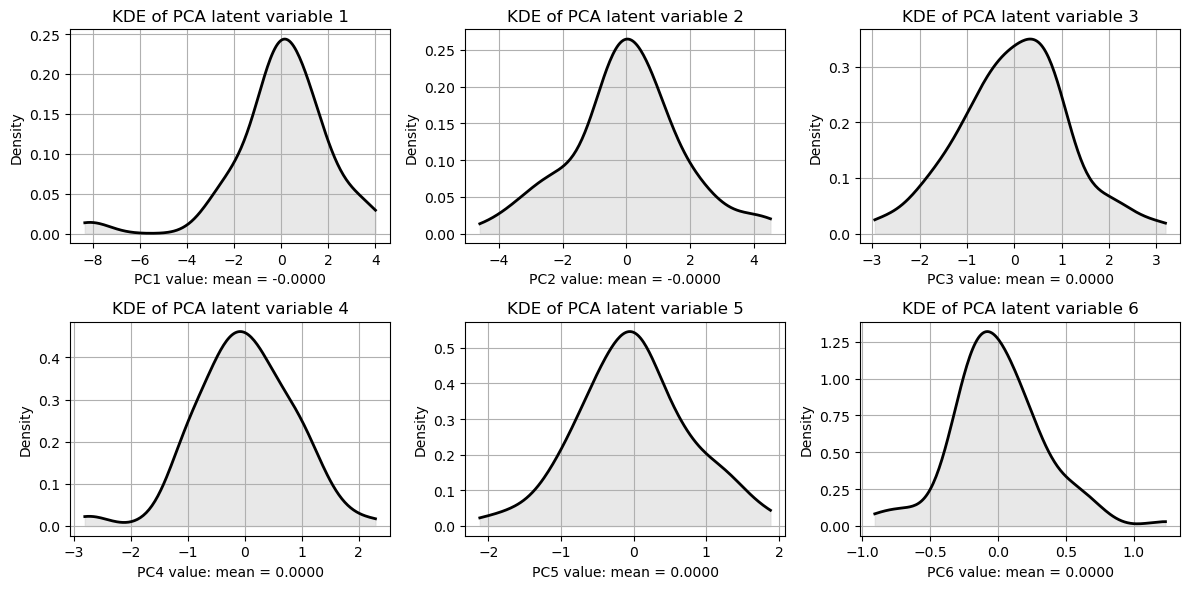

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_latent_kde(latent_data, index, bandwidth='scott', num_points=200, ax=None):
    x = latent_data[:, index]
    kde = gaussian_kde(x, bw_method=bandwidth)

    xs = np.linspace(min(x), max(x), num_points)
    ys = kde(xs)

    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))
    
    ax.plot(xs, ys, color='k', lw=2)
    ax.fill_between(xs, ys, color='lightgray', alpha=0.5)
    ax.set_title(f"KDE of PCA latent variable {index+1}")
    ax.set_xlabel(f"PC{index+1} value: mean = {np.mean(x):.4f}")
    ax.set_ylabel("Density")
    ax.grid(True)
    plt.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(12,6))
for i, ax in enumerate(axs.flat):
    plot_latent_kde(z_pca, i, ax=ax)
plt.tight_layout()
plt.show()

# Latent Space Joint KDEs

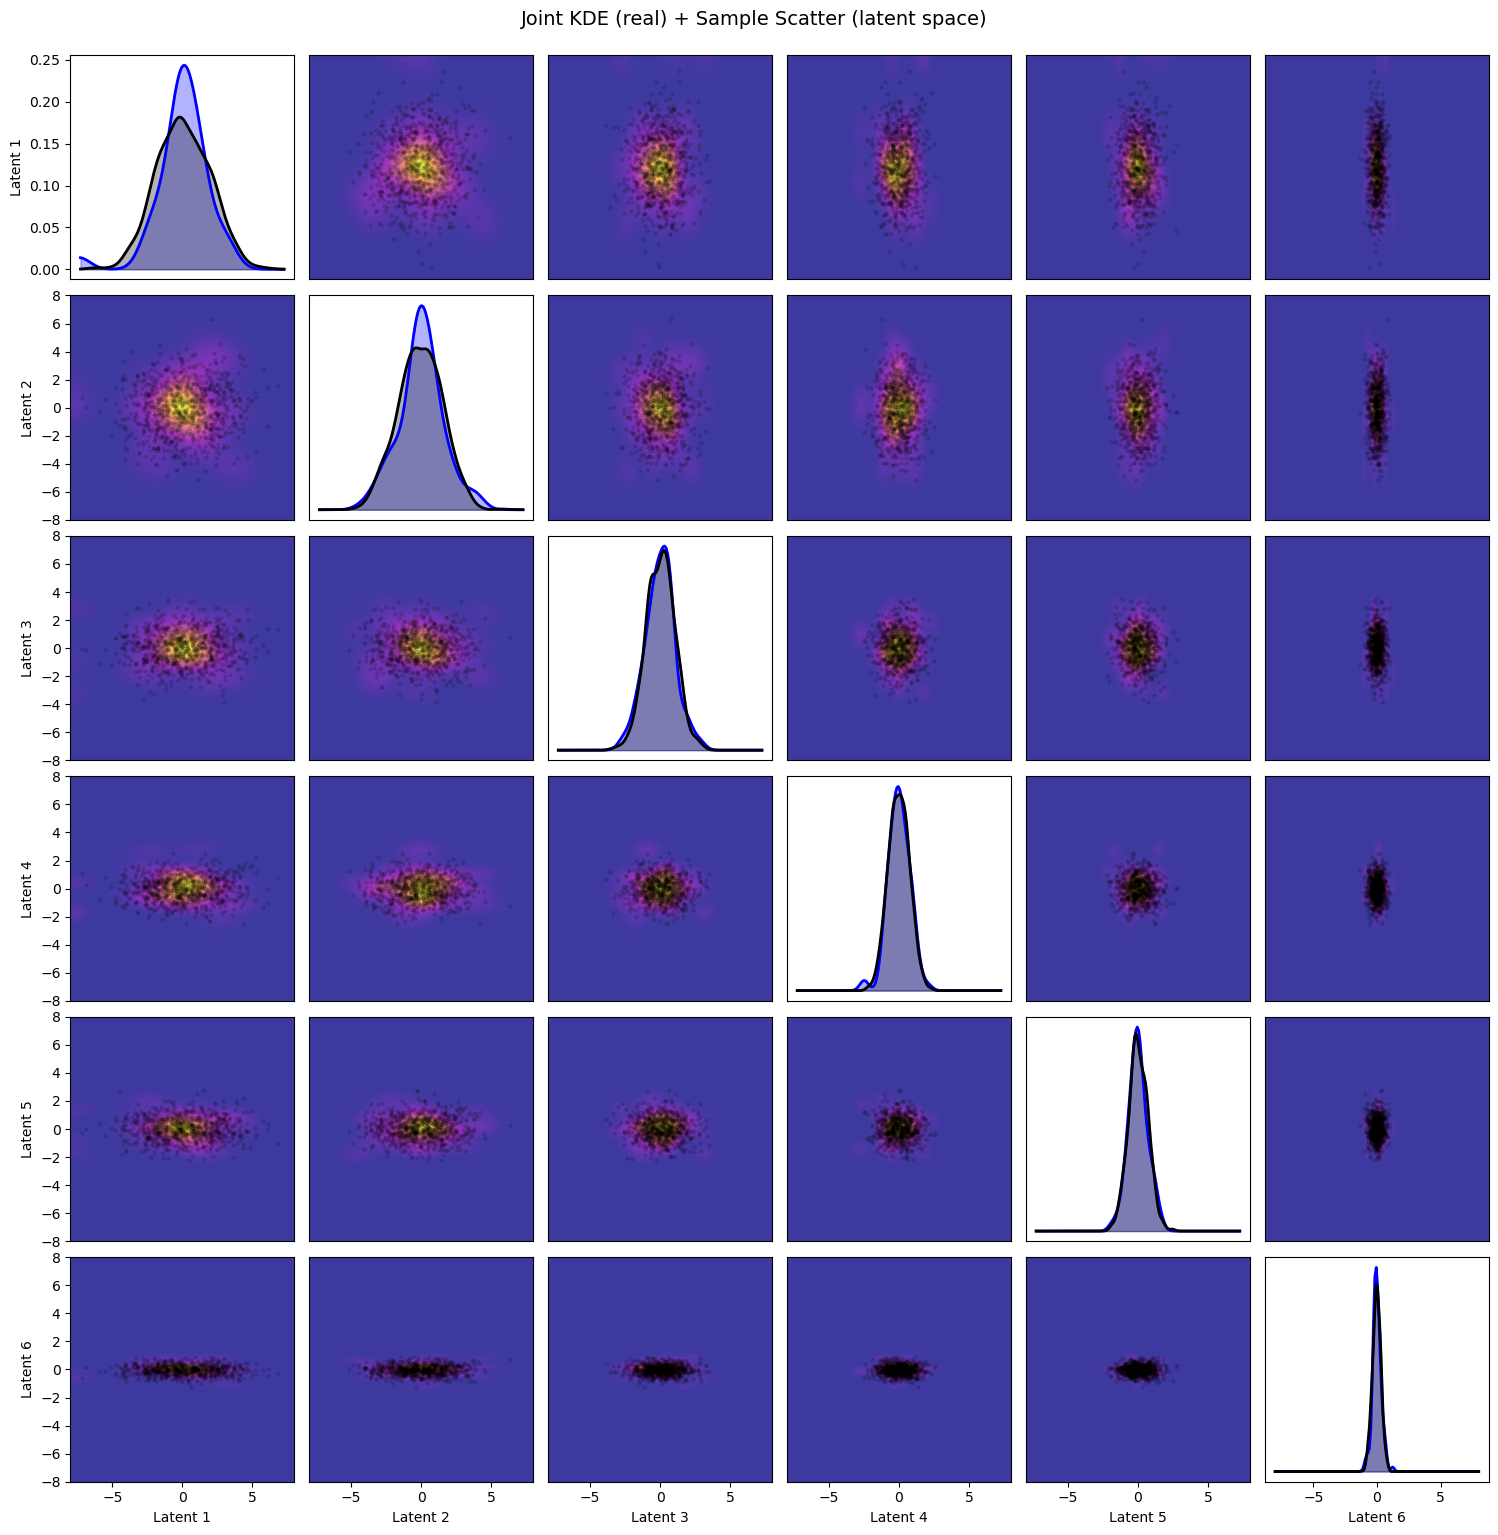

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_joint_kde_with_samples(latent_real, latent_sampled, bandwidth='scott', num_points=150, scatter_alpha=0.15, scatter_size=5):

    n_latent = latent_real.shape[1]
    fig, axs = plt.subplots(n_latent, n_latent, figsize=(2.5 * n_latent, 2.5 * n_latent))

    for i in range(n_latent):
        for j in range(n_latent):
            ax = axs[i, j]

            if i == j:
                # --- 1D KDE on diagonal ---
                x = latent_real[:, i]
                kde = gaussian_kde(x, bw_method=bandwidth)
                xs = np.linspace(-8, 8, num_points)
                ys = kde(xs)
                ax.plot(xs, ys, color='blue', lw=2)
                ax.fill_between(xs, ys, color='blue', alpha=0.3)

                # overlay histogram of sampled data
                x_samp = latent_sampled[:, i]
                kde_samp = gaussian_kde(x_samp, bw_method=bandwidth)
                ax.plot(xs, kde_samp(xs), color='k', lw=2)
                ax.fill_between(xs, kde_samp(xs), color='k', alpha=0.3)
            else:
                # --- 2D KDE on off-diagonals ---
                x = latent_real[:, j]
                y = latent_real[:, i]
                kde = gaussian_kde(np.vstack([x, y]), bw_method=bandwidth)

                X, Y = np.meshgrid(
                    np.linspace(-8, 8, num_points),
                    np.linspace(-8, 8, num_points)
                )
                Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

                # plot KDE heatmap
                ax.imshow(
                    Z,
                    extent=[-8, 8, -8, 8],
                    cmap="plasma",
                    aspect='auto',
                    alpha=0.8
                )

                # overlay sampled scatter points
                ax.scatter(
                    latent_sampled[:, j],
                    latent_sampled[:, i],
                    color='k',
                    s=scatter_size, alpha=scatter_alpha
                )

            # axis labels
            if i == n_latent - 1:
                ax.set_xlabel(f"Latent {j+1}")
            else:
                ax.set_xticks([])
            if j == 0:
                ax.set_ylabel(f"Latent {i+1}")
            else:
                ax.set_yticks([])

    plt.tight_layout()
    plt.suptitle("Joint KDE (real) + Sample Scatter (latent space)", y=1.02, fontsize=14)
    plt.show()

plot_joint_kde_with_samples(
    latent_real=z_pca, 
    latent_sampled=samples_pca[:1000, :],
    bandwidth='scott',
    scatter_alpha=0.1,
    scatter_size=5
)

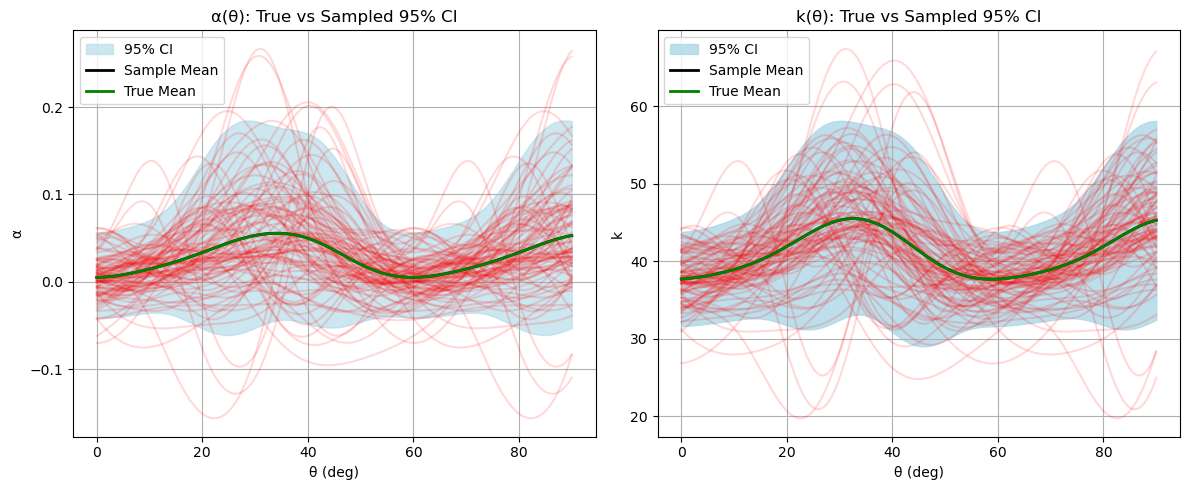

In [119]:
def get_alpha_k_vect(params, theta, N, return_k=True):
    omega = 2 * np.pi * theta / 60

    z_alpha = params[0]
    z_k = params[2*N+1]

    for m in range(1, N + 1):
        cos_coeff_a = params[2 * m - 1]
        sin_coeff_a = params[2 * m]
        z_alpha += cos_coeff_a * np.cos(m * omega) + sin_coeff_a * np.sin(m * omega)
        if return_k:
            cos_coeff_k = params[(2*N+1)+(2 * m - 1)]
            sin_coeff_k = params[(2*N+1)+(2 * m)]
            z_k += cos_coeff_k * np.cos(m * omega) + sin_coeff_k * np.sin(m * omega)
    
    # once we have the value of z_alpha and z_k, we must transform back to alpha and k:
    def softplus(z):
        return np.log1p(np.exp(-np.abs(z))) + np.maximum(z, 0)

    alpha = -np.sqrt(3) / 6 + softplus(z_alpha)
    if return_k:
        k = softplus(z_k)
        return alpha, k
    else:
        return alpha

theta = np.linspace(0, 90, 200)
alphas = []
ks = []

N = 2
num_samples = samples_z.shape[0]
num_theta = len(theta)

# preallocate arrays
alphas = np.empty((num_samples, num_theta))
ks = np.empty((num_samples, num_theta))


# loop, but fill directly into arrays
for i in range(num_samples):
    alpha, k = get_alpha_k(samples_z[i, :], theta, N)
    alphas[i, :] = alpha
    ks[i, :] = k

alpha_mean = np.mean(alphas, axis=0)
alpha_lower = np.percentile(alphas, 2.5, axis=0)
alpha_upper = np.percentile(alphas, 97.5, axis=0)

k_mean = np.mean(ks, axis=0)
k_lower = np.percentile(ks, 2.5, axis=0)
k_upper = np.percentile(ks, 97.5, axis=0)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# α(θ)
axs[0].fill_between(theta, alpha_lower, alpha_upper, color='lightblue', alpha=0.6, label='95% CI')
axs[0].plot(theta, alpha_mean, color='black', linewidth=2, label='Sample Mean')

all_real_alphas = []

# plot true (fitted) α curves
for i in range(len(zs)):
    params_true = zs.iloc[i].to_numpy()
    alpha_real, _ = get_alpha_k(params_true, theta, N)
    axs[0].plot(theta, alpha_real, color='red', alpha=0.15)
    all_real_alphas.append(alpha_real)
axs[0].plot(theta, np.mean(all_real_alphas, axis=0), color='green', linewidth=2, label='True Mean')

axs[0].set_title("α(θ): True vs Sampled 95% CI")
axs[0].set_xlabel("θ (deg)")
axs[0].set_ylabel("α")
axs[0].legend()
axs[0].grid(True)

all_real_ks = []
# k(θ)
axs[1].fill_between(theta, k_lower, k_upper, color='lightblue', alpha=0.8, label='95% CI')
axs[1].plot(theta, k_mean, color='black', linewidth=2, label='Sample Mean')

# plot true (fitted) k curves
for i in range(len(zs)):
    params_true = zs.iloc[i].to_numpy()
    _, k_real = get_alpha_k(params_true, theta, N)
    axs[1].plot(theta, k_real, color='red', alpha=0.15)
    all_real_ks.append(k_real)
axs[1].plot(theta, np.mean(all_real_ks, axis=0), color='green', linewidth=2, label='True Mean')
axs[1].set_title("k(θ): True vs Sampled 95% CI")
axs[1].set_xlabel("θ (deg)")
axs[1].set_ylabel("k")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()



Shifted Theta such that Theta[new] = Theta[old] - Rotation Angle.


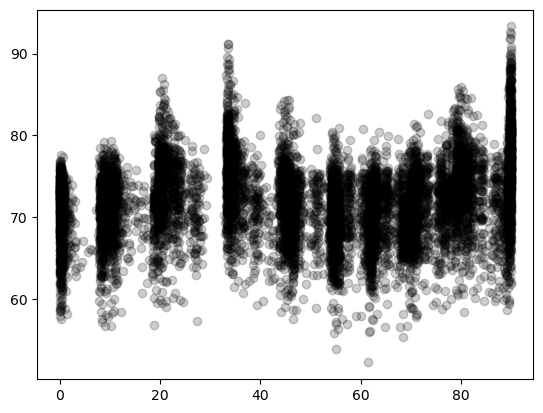

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, fixed
from scipy.stats import gaussian_kde
import local_config
from filter_csv import filter_data
from IPython.display import clear_output

df = pd.read_csv(f"{local_config.DATA_DIR}/rotation_tests/all_simulations.csv")

N = 2
defs = "MX"
# modifier = "_quad"  # can be nothing, _quad, or _NP

if defs == "MX":
    exact_filters = {
        "Defects": '{"DV": 0.25, "SV": 0.25}',
        # "Defect Random Seed": 54,
        # "Theta Requested": 90
    }
else:
    exact_filters = {
        "Defects": f'{{"{defs}": 0.5}}',
        # "Defect Random Seed": 54,
        # "Theta Requested": 90
    }

or_filters = {"Theta Requested": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]}

filtered_df = filter_data(df, exact_filters=exact_filters, or_filters=or_filters, duplic_freq=(0, 91, 10), 
                          remove_dupes=True, only_uniaxial=False, remove_biaxial=True)

plt.scatter(filtered_df["Theta"], filtered_df["Strength_1"], alpha=0.2, color='k')
plt.ylabel("Strength_1")
plt.xlabel("Theta")
plt.show()


# Visualization with softplus function z's

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, fixed
from scipy.stats import gaussian_kde
import local_config
from filter_csv import filter_data

df = pd.read_csv(f"{local_config.DATA_DIR}/rotation_tests/all_simulations.csv")

N = 2
defs = "SV"

if defs == "MX":
    exact_filters = {"Defects": '{"DV": 0.25, "SV": 0.25}'}
    or_filters = {}
elif defs.lower() == "none":
    exact_filters = {"Defects": "None"}
    or_filters = {"Theta Requested": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]}  # filter out all of the uniaxials
else:
    exact_filters = {"Defects": f'{{"{defs}": 0.5}}'}
    or_filters = {}

filtered_df = filter_data(df, exact_filters=exact_filters, or_filters=or_filters, flip_strengths=True, duplic_freq=(0, 91, 10), remove_dupes=True)


def get_alpha_k(params, theta, N, return_k=True):
    omega = 2 * np.pi * theta / 180  ######################################################################################3

    z_alpha = params[0]
    z_k = params[2*N+1]

    for m in range(1, N + 1):
        cos_coeff_a = params[2 * m - 1]
        sin_coeff_a = params[2 * m]
        z_alpha += cos_coeff_a * np.cos(m * omega) + sin_coeff_a * np.sin(m * omega)
        if return_k:
            cos_coeff_k = params[(2*N+1)+(2 * m - 1)]
            sin_coeff_k = params[(2*N+1)+(2 * m)]
            z_k += cos_coeff_k * np.cos(m * omega) + sin_coeff_k * np.sin(m * omega)
    
    # once we have the value of z_alpha and z_k, we must transform back to alpha and k:
    def softplus(z):
        return np.log1p(np.exp(-np.abs(z))) + np.maximum(z, 0)

    alpha = -np.sqrt(3) / 6 + softplus(z_alpha)
    if return_k:
        k = softplus(z_k)
        return alpha, k
    else:
        return alpha


def plot_dp(params, index, N=None, real_data=None, current_theta=0):
    z_coeffs = params[index]

    theta_buffer = 4

    current_alpha, current_k = get_alpha_k(z_coeffs, current_theta, N)

    min_strength = -20
    max_strength = 130

    grid = np.linspace(min_strength, max_strength, 600)
    sig1, sig2 = np.meshgrid(grid, grid)
    sig3 = np.zeros_like(sig1)
    i1 = sig1 + sig2 + sig3
    j2 = (sig1**2 + sig2**2 + sig3**2 - sig1*sig2 - sig2*sig3 - sig3*sig1) / 3.0

    F = np.sqrt(j2) + current_alpha * i1 - current_k
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

    fig.suptitle(f"Total Loss = {z_coeffs[-2]}")

    axs[0].contour(sig1, sig2, F, levels=[0], linewidths=2, colors='blue')  # F=0 curve
    axs[0].plot([], [], color="blue", label='Slice of 3D Surface')  # for legend
    axs[0].axhline(0, color='black', linewidth=1)
    axs[0].axvline(0, color='black', linewidth=1)
    axs[0].set_xlim(min_strength, max_strength); axs[0].set_ylim(min_strength, max_strength)
    axs[0].set_xlabel(r"$\sigma_1$")
    axs[0].set_ylabel(r"$\sigma_2$")
    axs[0].set_title(f"Drucker-Prager Surface  (α={current_alpha:.2f},  k={current_k:.1f})")

    current_seed_df = filter_data(real_data, exact_filters={"Defect Random Seed": index}, shift_theta=False)
    # current_seed_df = real_data

    if real_data is not None:
        df = filter_data(current_seed_df, range_filters={"Theta": (current_theta-theta_buffer, current_theta+theta_buffer)}, shift_theta=False)
        try:
            axs[0].scatter(df["Strength_1"], df["Strength_2"], color='green', alpha=(abs(df["Theta"]-current_theta) - theta_buffer) / -theta_buffer, label=f'MD Data +/- {theta_buffer}°')
        except ValueError:
            axs[0].scatter([], [], color="green", label=f'MD Data +/- {theta_buffer}°')

    axs[0].legend()

    thetas = np.linspace(0, 90, 200)
    alpha_fn, k_fn = get_alpha_k(z_coeffs, thetas, 2)
    axs[1].plot(thetas, alpha_fn, color='k', alpha=0.8, label='alpha')
    axs[1].plot([current_theta, current_theta], [-1, 71], color='green', linewidth=1, label='Current Theta')
    axs[2].plot(thetas, k_fn, color='k', alpha=0.8, label='k')
    axs[2].plot([current_theta, current_theta], [-1, 71], color='green', linewidth=1, label='Current Theta')

    axs[1].set_xlabel("theta")
    axs[1].set_ylabel("alpha")
    axs[1].set_title(f"Alpha vs Theta")
    axs[1].grid(alpha=0.3)
    axs[1].set_ylim(-0.2, 0.3)
    
    axs[2].set_xlabel("theta")
    axs[2].set_ylabel("k")
    axs[2].set_title(f"k vs Theta")
    axs[2].grid(alpha=0.3)
    axs[2].set_ylim(20, 70)

    plot_theta_kde(axs[1], current_seed_df)
    plot_theta_kde(axs[2], current_seed_df)

    axs[1].legend()
    axs[2].legend()

    plt.show(fig)

def plot_theta_kde(ax, df):
    # compute KDE over 0–90 range
    theta_vals = np.linspace(0, 90, 200)
    theta_data = df["Theta"].dropna()
    kde = gaussian_kde(theta_data)
    kde.set_bandwidth(bw_method=kde.factor / 25)
    density = kde(theta_vals)

    # normalize the density so it fits nicely at the bottom (say bottom 20%)
    ymin, ymax = ax.get_ylim()
    scale = 0.2 * (ymax - ymin)
    density_scaled = ymin + density / np.max(density) * scale

    # plot the KDE line at the bottom of the alpha plot
    ax.fill_between(theta_vals, ymin, density_scaled, color="green", alpha=0.2)
    ax.plot(theta_vals, density_scaled, color="green", linewidth=1, alpha=0.4, label="Theta Density")

# df_params = pd.read_csv(f"zs_{defs}.csv")
df_params = pd.read_csv(f"z_np_{defs.lower()}.csv")  # MAKE SURE TO CHANGE FUNCTION FROM PER TO NOT PER
zs = df_params.drop(columns=["Defect Random Seed"])
N = 2

theta_slider = FloatSlider(description='Theta', min=0, max=90, step=1, value=0, readout_format='.0f')
index_slider = IntSlider(description='Defect Seed', min=0, max=len(zs)-1, step=1, value=0)

interact(plot_dp, params=fixed(zs.to_numpy()), real_data=fixed(filtered_df), N=fixed(N), index=index_slider, current_theta=theta_slider)



Shifted Theta such that Theta[new] = Theta[old] - Rotation Angle.


interactive(children=(IntSlider(value=0, description='Defect Seed'), FloatSlider(value=0.0, description='Theta…

<function __main__.plot_dp(params, index, N=None, real_data=None, current_theta=0)>

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, fixed
from scipy.stats import gaussian_kde
import local_config
from filter_csv import filter_data

df = pd.read_csv(f"{local_config.DATA_DIR}/rotation_tests/all_simulations.csv")

N = 2
defs = "SV"

if defs == "MX":
    exact_filters = {"Defects": '{"DV": 0.25, "SV": 0.25}'}
    or_filters = {}
elif defs.lower() == "none":
    exact_filters = {"Defects": "None"}
    or_filters = {"Theta Requested": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]}  # filter out all of the uniaxials
else:
    exact_filters = {"Defects": f'{{"{defs}": 0.5}}'}
    or_filters = {}

filtered_df = filter_data(df, exact_filters=exact_filters, or_filters=or_filters, flip_strengths=True, duplic_freq=(0, 91, 10), remove_dupes=True)


def get_alpha_k(params, theta, N, return_k=True):
    omega = 2 * np.pi * theta / 180  ######################################################################################3

    z_alpha = params[0]
    z_k = params[2*N+1]

    for m in range(1, N + 1):
        cos_coeff_a = params[2 * m - 1]
        sin_coeff_a = params[2 * m]
        z_alpha += cos_coeff_a * np.cos(m * omega) + sin_coeff_a * np.sin(m * omega)
        if return_k:
            cos_coeff_k = params[(2*N+1)+(2 * m - 1)]
            sin_coeff_k = params[(2*N+1)+(2 * m)]
            z_k += cos_coeff_k * np.cos(m * omega) + sin_coeff_k * np.sin(m * omega)
    
    # once we have the value of z_alpha and z_k, we must transform back to alpha and k:
    def softplus(z):
        return np.log1p(np.exp(-np.abs(z))) + np.maximum(z, 0)

    alpha = -np.sqrt(3) / 6 + softplus(z_alpha)
    if return_k:
        k = softplus(z_k)
        return alpha, k
    else:
        return alpha


def plot_dp(params, N=None, real_data=None, current_theta=0):

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

    min_strength = -20
    max_strength = 130
    # fig.suptitle(f"Total Loss = {z_coeffs[-2]}")
    axs[0].plot([], [], color="blue", label='Slice of 3D Surface')  # for legend
    axs[0].axhline(0, color='black', linewidth=1)
    axs[0].axvline(0, color='black', linewidth=1)
    axs[0].set_xlim(min_strength, max_strength); axs[0].set_ylim(min_strength, max_strength)
    axs[0].set_xlabel(r"$\sigma_1$")
    axs[0].set_ylabel(r"$\sigma_2$")

    low_alpha = 0
    low_a_indx = 0
    low_k = 50
    low_k_indx = 0

    for index in range(101):
        z_coeffs = params[index]

        theta_buffer = 4

        current_alpha, current_k = get_alpha_k(z_coeffs, current_theta, N)
        if current_alpha < low_alpha:
            low_alpha = current_alpha
            low_a_indx = index
        if current_k < low_k:
            low_k = current_k
            low_k_indx = index

        grid = np.linspace(min_strength, max_strength, 600)
        sig1, sig2 = np.meshgrid(grid, grid)
        sig3 = np.zeros_like(sig1)
        i1 = sig1 + sig2 + sig3
        j2 = (sig1**2 + sig2**2 + sig3**2 - sig1*sig2 - sig2*sig3 - sig3*sig1) / 3.0

        F = np.sqrt(j2) + current_alpha * i1 - current_k
        axs[0].contour(sig1, sig2, F, levels=[0], linewidths=2, colors='blue', alpha=0.5)  # F=0 curve

        if real_data is not None:
            df = filter_data(real_data, range_filters={"Theta": (current_theta-theta_buffer, current_theta+theta_buffer)}, shift_theta=False)
            try:
                axs[0].scatter(df["Strength_1"], df["Strength_2"], color='green', alpha=(abs(df["Theta"]-current_theta) - theta_buffer) / -theta_buffer, label=f'MD Data +/- {theta_buffer}°')
            except ValueError:
                axs[0].scatter([], [], color="green", label=f'MD Data +/- {theta_buffer}°')

        thetas = np.linspace(0, 90, 200)
        alpha_fn, k_fn = get_alpha_k(z_coeffs, thetas, 2)
        axs[1].plot(thetas, alpha_fn, color='k', alpha=0.8, label='alpha')
        axs[1].plot([current_theta, current_theta], [-1, 71], color='green', linewidth=1, label='Current Theta')
        axs[2].plot(thetas, k_fn, color='k', alpha=0.8, label='k')
        axs[2].plot([current_theta, current_theta], [-1, 71], color='green', linewidth=1, label='Current Theta')

    print(low_a_indx, low_alpha)
    print(low_k_indx, low_k)
    z_coeffs_lowa = params[low_a_indx]
    lowa_alpha, lowa_k = get_alpha_k(z_coeffs_lowa, current_theta, N)
    z_coeffs_lowk = params[low_k_indx]
    lowk_alpha, lowk_k = get_alpha_k(z_coeffs_lowk, current_theta, N)
    grid = np.linspace(min_strength, max_strength, 600)
    sig1, sig2 = np.meshgrid(grid, grid)
    sig3 = np.zeros_like(sig1)
    i1 = sig1 + sig2 + sig3
    j2 = (sig1**2 + sig2**2 + sig3**2 - sig1*sig2 - sig2*sig3 - sig3*sig1) / 3.0
    Fa = np.sqrt(j2) + lowa_alpha * i1 - lowa_k
    Fk = np.sqrt(j2) + lowk_alpha * i1 - lowk_k
    axs[0].contour(sig1, sig2, Fa, levels=[0], linewidths=2, colors='gold')  # F=0 curve
    axs[0].contour(sig1, sig2, Fk, levels=[0], linewidths=2, colors='red')  # F=0 curve
    
    # axs[0].legend()
    axs[1].set_xlabel("theta")
    axs[1].set_ylabel("alpha")
    axs[1].set_title(f"Alpha vs Theta")
    axs[1].grid(alpha=0.3)
    axs[1].set_ylim(-0.2, 0.3)
    
    axs[2].set_xlabel("theta")
    axs[2].set_ylabel("k")
    axs[2].set_title(f"k vs Theta")
    axs[2].grid(alpha=0.3)
    axs[2].set_ylim(20, 70)
    # axs[1].legend()
    # axs[2].legend()

    plt.show(fig)

def plot_theta_kde(ax, df):
    # compute KDE over 0–90 range
    theta_vals = np.linspace(0, 90, 200)
    theta_data = df["Theta"].dropna()
    kde = gaussian_kde(theta_data)
    kde.set_bandwidth(bw_method=kde.factor / 25)
    density = kde(theta_vals)

    # normalize the density so it fits nicely at the bottom (say bottom 20%)
    ymin, ymax = ax.get_ylim()
    scale = 0.2 * (ymax - ymin)
    density_scaled = ymin + density / np.max(density) * scale

    # plot the KDE line at the bottom of the alpha plot
    ax.fill_between(theta_vals, ymin, density_scaled, color="green", alpha=0.2)
    ax.plot(theta_vals, density_scaled, color="green", linewidth=1, alpha=0.4, label="Theta Density")

# df_params = pd.read_csv(f"zs_{defs}.csv")
df_params = pd.read_csv(f"z_np_{defs.lower()}.csv")  # MAKE SURE TO CHANGE FUNCTION FROM PER TO NOT PER
zs = df_params.drop(columns=["Defect Random Seed"])
N = 2

theta_slider = FloatSlider(description='Theta', min=0, max=90, step=1, value=0, readout_format='.0f')

interact(plot_dp, params=fixed(zs.to_numpy()), real_data=fixed(filtered_df), N=fixed(N), current_theta=theta_slider)

Shifted Theta such that Theta[new] = Theta[old] - Rotation Angle.


interactive(children=(FloatSlider(value=0.0, description='Theta', max=90.0, readout_format='.0f', step=1.0), O…

<function __main__.plot_dp(params, N=None, real_data=None, current_theta=0)>

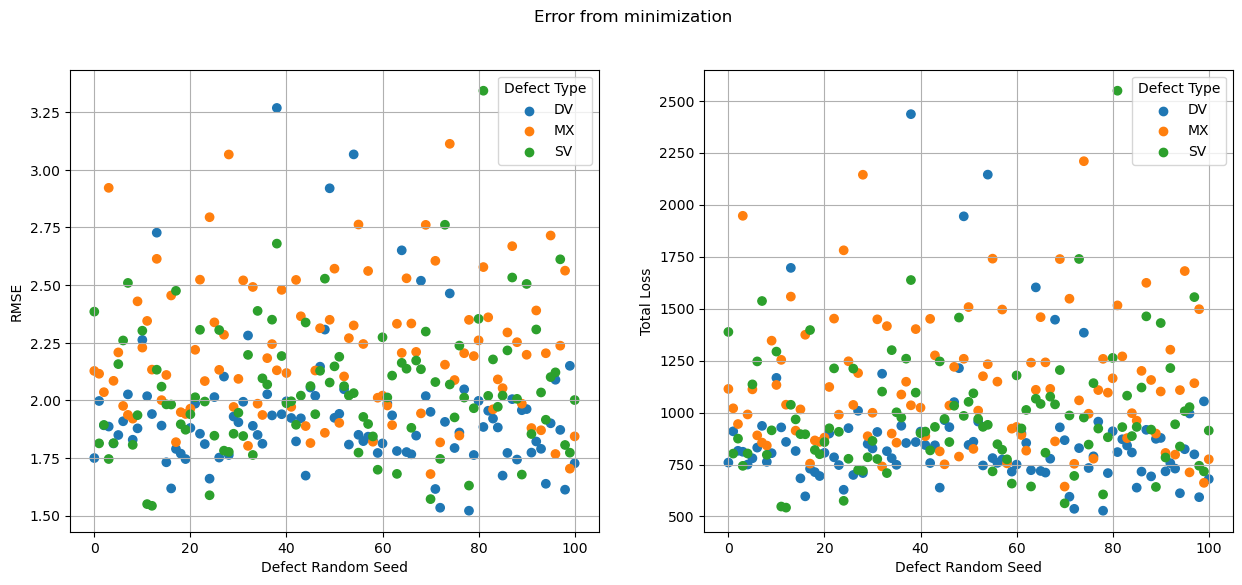

In [163]:

df_params = pd.read_csv(f"z_all_np.csv")


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))


# Suppose df_params["Defect Type"] has strings like "SV", "DV", "MX"
unique_types = df_params["Defect Type"].unique()
color_map = {t: c for t, c in zip(unique_types, plt.cm.tab10.colors)}

# Map to colors
colors = df_params["Defect Type"].map(color_map)

fig.suptitle("Error from minimization")

axs[0].scatter(df_params["Defect Random Seed"], df_params["RMSE"], c=colors)
axs[0].set_xlabel("Defect Random Seed")
axs[0].set_ylabel("RMSE")

# Add legend
for defect_type, color in color_map.items():
    axs[0].scatter([], [], color=color, label=defect_type)
axs[0].legend(title="Defect Type")
axs[0].grid()


axs[1].scatter(df_params["Defect Random Seed"], df_params["Total Loss"], c=colors)
axs[1].set_xlabel("Defect Random Seed")
axs[1].set_ylabel("Total Loss")

# Add legend
for defect_type, color in color_map.items():
    axs[1].scatter([], [], color=color, label=defect_type)
axs[1].legend(title="Defect Type")

axs[1].grid()
plt.show()

In [ ]:
import plotly.graph_objects as go

zs = pd.read_csv("z_np_none.csv").drop(columns=["Defect Random Seed", "Total Loss", "RMSE"]).iloc[0].to_numpy()

def get_alpha_k(params, theta, N, return_k=True):
    # ensure numpy arrays
    theta = np.asarray(theta, dtype=float)
    omega = 2 * np.pi * theta / 180.0

    # broadcast scalars to shape of theta
    z_alpha = np.full_like(omega, params[0], dtype=float)
    z_k     = np.full_like(omega, params[2*N+1], dtype=float) if return_k else None

    # vectorized Fourier series (no loop over theta)
    for m in range(1, N + 1):
        ca, sa = params[2*m - 1], params[2*m]
        z_alpha += ca * np.cos(m * omega) + sa * np.sin(m * omega)
        if return_k:
            ck, sk = params[(2*N+1)+(2*m - 1)], params[(2*N+1)+(2*m)]
            z_k += ck * np.cos(m * omega) + sk * np.sin(m * omega)

    # stable, vectorized softplus
    def softplus(z):
        return np.log1p(np.exp(-np.abs(z))) + np.maximum(z, 0.0)

    alpha = -np.sqrt(3.0)/6.0 + softplus(z_alpha)
    if return_k:
        k = softplus(z_k)
        return alpha, k
    else:
        return alpha

resolution = 250

sig_grid = np.linspace(-15, 130, resolution)
theta_vals = np.linspace(0, 90, resolution)

# Create 3D meshgrid (σ1, σ2, θ)
sig1, sig2, theta = np.meshgrid(sig_grid, sig_grid, theta_vals, indexing='ij')
sig3 = np.zeros_like(sig1)

# Invariants
i1 = sig1 + sig2 + sig3
mean_stress = i1 / 3
dev_xx = sig1 - mean_stress
dev_yy = sig2 - mean_stress
dev_zz = sig3 - mean_stress
j2 = 0.5 * (dev_xx**2 + dev_yy**2 + dev_zz**2)

fig = go.Figure()

alpha_theta, k_theta = get_alpha_k(zs, theta, 2)

# Evaluate Drucker-Prager F = √J₂ + α(θ)·I₁ - k(θ)
F = np.sqrt(j2) + alpha_theta * i1 - k_theta

# Threshold for where to plot the surface (surface band)
f_tol = 0.5  # change if surface too thick or thin

# Mask for F ≈ 0
mask = np.abs(F) < f_tol

# Extract matching surface points
surface_x = sig1[mask].flatten()
surface_y = sig2[mask].flatten()
surface_theta = theta[mask].flatten()

color_vals = np.maximum(surface_x, surface_y)

fig.add_trace(
    go.Scatter3d(
        x=filtered_df["Strength_1"],
        y=filtered_df["Strength_2"],
        z=filtered_df["Theta"],
        mode="markers",
        marker=dict(color="black", size=3),
        name="Data Points"
    )
)

# Add the Drucker–Prager surface (where F ≈ 0)
fig.add_trace(
    go.Scatter3d(
        x=surface_x,
        y=surface_y,
        z=surface_theta,
        mode="markers",
        marker=dict(
            size=2,
            # color="red",
            color=color_vals,
            colorscale="ice",
            opacity=0.2,
            # showscale=((surf.instance == 0)),
            # colorbar=dict(title="max(σ₁, σ₂)", x=-0.2) if surf.instance == 0 else None
        ),
        name=f"Pristine Strength Surface"
    )
)

fig.update_layout(
    title=f"Strength Surface at Different Angles", 
    coloraxis_colorbar=dict(x=-5),
    scene=dict(xaxis_title="σ₁ (GPa)", yaxis_title="σ₂ (GPa)", zaxis_title="θ (°)", 
                xaxis_title_font=dict(size=20), yaxis_title_font=dict(size=20), zaxis_title_font=dict(size=20), 
                xaxis=dict(tickfont=dict(size=12)), yaxis=dict(tickfont=dict(size=12)), zaxis=dict(tickfont=dict(size=12), tick0=0, dtick=15)),

    scene_camera=dict(
        eye=dict(x=1.8, y=1.8, z=0.8),   # diagonal downward angle
        up=dict(x=0, y=0, z=1)            # z-axis remains vertical
    ),
)
# Save plot
folder = f"{local_config.DATA_DIR}/rotation_tests"
html_path = f"{folder}/plots/final_pristine.html"
fig.write_html(html_path, include_plotlyjs="cdn")
print(f"Interactive 3D plot saved to {html_path}")
# fig.show()

Interactive 3D plot saved to /home/avb25/lammps_projects/Graphene_Strength_Surface/simulation_data/rotation_tests/plots/final_pristine.html


   theta    a mean  a lower 95  a upper 95     k mean  k lower 95  k upper 95
0    0.0 -0.011179   -0.069709    0.056203  36.246326    28.69144   43.751055
     theta    a mean  a lower 95  a upper 95     k mean  k lower 95  \
199   90.0  0.099608   -0.019328    0.245294  51.491533   35.737514   

     k upper 95  
199   67.157765  


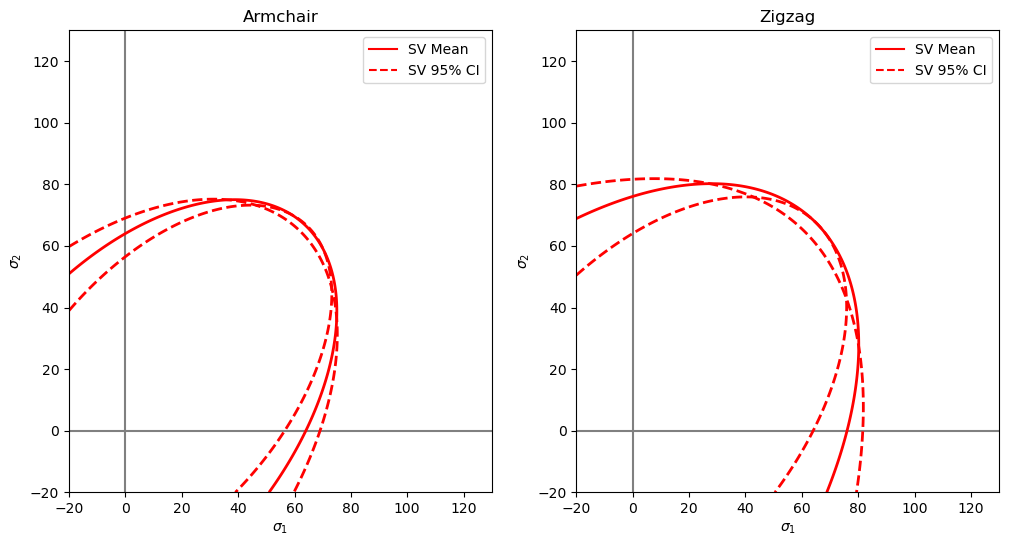

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_dp(a, k, col, style, ax, label=None):
    min_strength = -20
    max_strength = 130

    grid = np.linspace(min_strength, max_strength, 600)
    sig1, sig2 = np.meshgrid(grid, grid)
    sig3 = np.zeros_like(sig1)
    i1 = sig1 + sig2 + sig3
    j2 = (sig1**2 + sig2**2 + sig3**2 - sig1*sig2 - sig2*sig3 - sig3*sig1) / 3.0
    F = np.sqrt(j2) + a * i1 - k
    ax.contour(sig1, sig2, F, levels=[0], colors=col, linewidths=2, linestyles=style)
    if label is not None:
        ax.plot([], [], color=col, label=label, linestyle=style)  # for legend 

def plot_stats(csv, col, lab, axs):
    df = pd.read_csv(csv)
    theta0 = df.loc[df['theta'] == 0]
    theta90 = df.loc[df['theta'] == 90]
    print(theta0)
    print(theta90)
    plot_dp(theta0['a mean'].values[0], theta0['k mean'].values[0], col, 'solid', axs[0], label=f'{lab} Mean')
    plot_dp(theta0['a upper 95'].values[0], theta0['k upper 95'].values[0], col, 'dashed', axs[0], label=f'{lab} 95% CI')
    plot_dp(theta0['a lower 95'].values[0], theta0['k lower 95'].values[0], col, 'dashed', axs[0])

    plot_dp(theta90['a mean'].values[0], theta90['k mean'].values[0], col, 'solid', axs[1], label=f'{lab} Mean')
    plot_dp(theta90['a upper 95'].values[0], theta90['k upper 95'].values[0], col, 'dashed', axs[1], label=f'{lab} 95% CI')
    plot_dp(theta90['a lower 95'].values[0], theta90['k lower 95'].values[0], col, 'dashed', axs[1])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].plot([-30, 130], [0, 0], 'grey')
axs[0].plot([0, 0], [-30, 130], 'grey')

axs[1].plot([-30, 130], [0, 0], 'grey')
axs[1].plot([0, 0], [-30, 130], 'grey')

plot_stats('stats_sv.csv', 'red', 'SV', axs)
# plot_stats('stats_dv.csv', 'blue', 'DV', axs)
# plot_stats('stats_mx.csv', 'green', 'SV+DV', axs)

# plot_dp(0.05223916297796309, 60.484372906403614, 'k', 'solid', axs[0], label='Pristine')
# plot_dp(0.3304274578958919, 112.19340524425395, 'k', 'solid', axs[1], label='Pristine')

axs[0].set_title("Armchair")
axs[1].set_title("Zigzag")

axs[0].set_xlabel(r"$\sigma_{1}$")
axs[1].set_xlabel(r"$\sigma_{1}$")
axs[0].set_ylabel(r"$\sigma_{2}$")
axs[1].set_ylabel(r"$\sigma_{2}$")

axs[0].set_xlim([-20, 130])
axs[0].set_ylim([-20, 130])
axs[1].set_xlim([-20, 130])
axs[1].set_ylim([-20, 130])

axs[0].legend()
axs[1].legend()
plt.show()